# pandas Foundations
- William Surles
- 2017-10-27
- data camp course
-[https://www.datacamp.com/courses/pandas-foundations](https://www.datacamp.com/courses/pandas-foundations)


## What's Covered
- Data ingestion and inspections
 - Building DataFrames from scratch
 - Importing & exporting data
 - Plotting with pandas
- Exploratory data analysis
 - Visual exploratory data analysis
 - Statistical exploratory data analysis
 - Separating populations with Boolean indexing
- Time series in pandas
 - Indexing pandas time series
 - Resampling pandas time series
 - Manipulating pandas time series
 - Visualizing pandas time series
- Case Study - Sunlight in Austin
 - Reading and cleaning the data
 - Statistical exploratory data analysis
 - Visual exploratory data analysis

## Additional Resources

## Libraries and Data

In [234]:
import pandas as pd
import pandas_datareader.data as web
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data ingestion & inspections

## Review of pandas DataFrames

- They use some apple stock data for their video examples
- This data is not provided on the class site
- I'm going to first run some code to get apple stock data for practice

In [9]:
start = datetime.datetime(2016,1,1)
end = datetime.date.today()

apple = f = web.DataReader("AAPL", 'yahoo', start, end)
apple.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2016-01-04  102.610001  105.370003  102.000000  105.349998  101.790649   
2016-01-05  105.750000  105.849998  102.410004  102.709999   99.239845   
2016-01-06  100.559998  102.370003   99.870003  100.699997   97.297760   
2016-01-07   98.680000  100.129997   96.430000   96.449997   93.191338   
2016-01-08   98.550003   99.110001   96.760002   96.959999   93.684120   

              Volume  
Date                  
2016-01-04  67649400  
2016-01-05  55791000  
2016-01-06  68457400  
2016-01-07  81094400  
2016-01-08  70798000

#### Indexes and columns
- 'indexes in pandas are tabled lists of labels that allow fast lookup and some powerful relational operations'

In [12]:
type(apple)

pandas.core.frame.DataFrame

In [13]:
apple.shape

(459, 6)

In [14]:
apple.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

- Notice the apple.columns atrribute is also a pandas index

In [16]:
type(apple.columns)

pandas.core.indexes.base.Index

- in this case the index on the dataframe is a special kind of index called a datetime index

In [17]:
apple.index

DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15',
               ...
               '2017-10-13', '2017-10-16', '2017-10-17', '2017-10-18',
               '2017-10-19', '2017-10-20', '2017-10-23', '2017-10-24',
               '2017-10-25', '2017-10-27'],
              dtype='datetime64[ns]', name='Date', length=459, freq=None)

#### Slicing
- you can use `iloc` to slice by index or `loc` to slice by column and row labels

In [19]:
apple.iloc[:5,:]

Open        High         Low       Close   Adj Close  \
Date                                                                     
2016-01-04  102.610001  105.370003  102.000000  105.349998  101.790649   
2016-01-05  105.750000  105.849998  102.410004  102.709999   99.239845   
2016-01-06  100.559998  102.370003   99.870003  100.699997   97.297760   
2016-01-07   98.680000  100.129997   96.430000   96.449997   93.191338   
2016-01-08   98.550003   99.110001   96.760002   96.959999   93.684120   

              Volume  
Date                  
2016-01-04  67649400  
2016-01-05  55791000  
2016-01-06  68457400  
2016-01-07  81094400  
2016-01-08  70798000

In [20]:
apple.iloc[-5:,:]

Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-10-20  156.610001  157.750000  155.960007  156.250000  156.250000   
2017-10-23  156.889999  157.690002  155.500000  156.169998  156.169998   
2017-10-24  156.289993  157.419998  156.199997  157.100006  157.100006   
2017-10-25  156.910004  157.550003  155.270004  156.410004  156.410004   
2017-10-27  159.289993  160.789993  158.699997  160.610001  160.610001   

              Volume  
Date                  
2017-10-20  23974100  
2017-10-23  21984300  
2017-10-24  17757200  
2017-10-25  20563900  
2017-10-27  12385034

#### head() and tail()

In [21]:
apple.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2016-01-04  102.610001  105.370003  102.000000  105.349998  101.790649   
2016-01-05  105.750000  105.849998  102.410004  102.709999   99.239845   
2016-01-06  100.559998  102.370003   99.870003  100.699997   97.297760   
2016-01-07   98.680000  100.129997   96.430000   96.449997   93.191338   
2016-01-08   98.550003   99.110001   96.760002   96.959999   93.684120   

              Volume  
Date                  
2016-01-04  67649400  
2016-01-05  55791000  
2016-01-06  68457400  
2016-01-07  81094400  
2016-01-08  70798000

In [22]:
apple.head(10)

Open        High         Low       Close   Adj Close  \
Date                                                                     
2016-01-04  102.610001  105.370003  102.000000  105.349998  101.790649   
2016-01-05  105.750000  105.849998  102.410004  102.709999   99.239845   
2016-01-06  100.559998  102.370003   99.870003  100.699997   97.297760   
2016-01-07   98.680000  100.129997   96.430000   96.449997   93.191338   
2016-01-08   98.550003   99.110001   96.760002   96.959999   93.684120   
2016-01-11   98.970001   99.059998   97.339996   98.529999   95.201073   
2016-01-12  100.550003  100.690002   98.839996   99.959999   96.582756   
2016-01-13  100.320000  101.190002   97.300003   97.389999   94.099594   
2016-01-14   97.959999  100.480003   95.739998   99.519997   96.157608   
2016-01-15   96.199997   97.709999   95.360001   97.129997   93.848373   

              Volume  
Date                  
2016-01-04  67649400  
2016-01-05  55791000  
2016-01-06  68457400  
2016-01-07  81094400  
2016-01-08  70798000  
2016-01-11  49568300  
2016-01-12  49154200  
2016-01-13  62439600  
2016-01-14  63170100  
2016-01-15  79833900

In [23]:
apple.tail()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-10-20  156.610001  157.750000  155.960007  156.250000  156.250000   
2017-10-23  156.889999  157.690002  155.500000  156.169998  156.169998   
2017-10-24  156.289993  157.419998  156.199997  157.100006  157.100006   
2017-10-25  156.910004  157.550003  155.270004  156.410004  156.410004   
2017-10-27  159.289993  160.789993  158.699997  160.610001  160.610001   

              Volume  
Date                  
2017-10-20  23974100  
2017-10-23  21984300  
2017-10-24  17757200  
2017-10-25  20563900  
2017-10-27  12385034

#### info()
- `info()` tells us 
 - the index
 - column labels and data types
 - number of rows and columns

In [25]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 459 entries, 2016-01-04 to 2017-10-27
Data columns (total 6 columns):
Open         459 non-null float64
High         459 non-null float64
Low          459 non-null float64
Close        459 non-null float64
Adj Close    459 non-null float64
Volume       459 non-null int64
dtypes: float64(5), int64(1)
memory usage: 25.1 KB


#### broadcasting
- This lets you mutate values based on a positional pattern

In [29]:
apple.iloc[::3, -1] = np.nan
apple.head(10)

Open        High         Low       Close   Adj Close  \
Date                                                                     
2016-01-04  102.610001  105.370003  102.000000  105.349998  101.790649   
2016-01-05  105.750000  105.849998  102.410004  102.709999   99.239845   
2016-01-06  100.559998  102.370003   99.870003  100.699997   97.297760   
2016-01-07   98.680000  100.129997   96.430000   96.449997   93.191338   
2016-01-08   98.550003   99.110001   96.760002   96.959999   93.684120   
2016-01-11   98.970001   99.059998   97.339996   98.529999   95.201073   
2016-01-12  100.550003  100.690002   98.839996   99.959999   96.582756   
2016-01-13  100.320000  101.190002   97.300003   97.389999   94.099594   
2016-01-14   97.959999  100.480003   95.739998   99.519997   96.157608   
2016-01-15   96.199997   97.709999   95.360001   97.129997   93.848373   

                Volume  
Date                    
2016-01-04         NaN  
2016-01-05  55791000.0  
2016-01-06  68457400.0  
2016-01-07         NaN  
2016-01-08  70798000.0  
2016-01-11  49568300.0  
2016-01-12         NaN  
2016-01-13  62439600.0  
2016-01-14  63170100.0  
2016-01-15         NaN

In [30]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 459 entries, 2016-01-04 to 2017-10-27
Data columns (total 6 columns):
Open         459 non-null float64
High         459 non-null float64
Low          459 non-null float64
Close        459 non-null float64
Adj Close    459 non-null float64
Volume       306 non-null float64
dtypes: float64(6)
memory usage: 25.1 KB


#### Series
- The columns of the data frame are each a series
- to extract the numerical entires from the series, use the `.values` attribute
- the data in the series form a numpy array
- in summary
 - a series is a one dimensional labeled numpy array
 - a dataframe is a two dimensional labeled array whose columns are series
 

In [32]:
low = apple['Low']
type(low)

pandas.core.series.Series

In [33]:
low.head()

Date
2016-01-04    102.000000
2016-01-05    102.410004
2016-01-06     99.870003
2016-01-07     96.430000
2016-01-08     96.760002
Name: Low, dtype: float64

In [34]:
low_v = low.values
type(low_v)

numpy.ndarray

### Inspecting your data

- First, lets load the world population data to use in these exercises

In [35]:
df = pd.read_csv('https://assets.datacamp.com/production/course_1639/datasets/world_population.csv')

In [36]:
df.head()

Year  Total Population
0  1960      3.034971e+09
1  1970      3.684823e+09
2  1980      4.436590e+09
3  1990      5.282716e+09
4  2000      6.115974e+09

In [37]:
df.tail()

Year  Total Population
1  1970      3.684823e+09
2  1980      4.436590e+09
3  1990      5.282716e+09
4  2000      6.115974e+09
5  2010      6.924283e+09

### DataFrame data types

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
Year                6 non-null int64
Total Population    6 non-null float64
dtypes: float64(1), int64(1)
memory usage: 176.0 bytes


### NumPy and pandas working together
- Pandas depends upon and interoperates with NumPy. 
- you can pass pandas data tructures to NumPy methods as we will do here.

In [42]:
# Create array of DataFrame values: np_vals
np_vals = df.values

# Create new array of base 10 logarithm values: np_vals_log10
np_vals_log10 = np.log10(np_vals)

# Create array of new DataFrame by passing df to np.log10(): df_log10
df_log10 = np.log10(df)

# Print original and new data containers
print(type(np_vals), type(np_vals_log10))
print(np_vals_log10)
print('--------------')
print(type(df), type(df_log10))
print(df_log10)


<class 'numpy.ndarray'> <class 'numpy.ndarray'>
[[ 3.29225607  9.48215448]
 [ 3.29446623  9.5664166 ]
 [ 3.29666519  9.64704933]
 [ 3.29885308  9.72285726]
 [ 3.30103     9.78646566]
 [ 3.30319606  9.84037481]]
--------------
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
       Year  Total Population
0  3.292256          9.482154
1  3.294466          9.566417
2  3.296665          9.647049
3  3.298853          9.722857
4  3.301030          9.786466
5  3.303196          9.840375


## Building DataFrames from scratch

#### Dataframes from csv files

In [45]:
file = 'https://assets.datacamp.com/production/course_1639/datasets/world_population.csv'
pop = pd.read_csv(file)
print(pop)


   Year  Total Population
0  1960      3.034971e+09
1  1970      3.684823e+09
2  1980      4.436590e+09
3  1990      5.282716e+09
4  2000      6.115974e+09
5  2010      6.924283e+09


#### DataFrames from dict
- keys are used as column labels

In [48]:
data = {'weekdays':['Sun','Sun','Mon','Mon'],
       'city':['Austin','Dallas','Austin','Dallas'],
       'visitors':[139,237,326,456],
       'signups':[7,12,3,5]}

users = pd.DataFrame(data)

print(users)

     city  signups  visitors weekday
0  Austin        7       139     Sun
1  Dallas       12       237     Sun
2  Austin        3       326     Mon
3  Dallas        5       456     Mon


- You can also get there from a list of list
 - zip this into a list of tuples
 - create a dictionary
 - create a dataframe

In [52]:
weekdays = ['Sun','Sun','Mon','Mon']
cities = ['Austin','Dallas','Austin','Dallas']
visitors = [139,237,326,456]
signups = [7,12,3,5]

list_labels = ['city', 'signups', 'visitors', 'weekday']
list_cols = [cities, signups, visitors, weekdays]

zipped = list(zip(list_labels, list_cols))

print(type(zipped))
print(zipped)

<class 'list'>
[('city', ['Austin', 'Dallas', 'Austin', 'Dallas']), ('signups', [7, 12, 3, 5]), ('visitors', [139, 237, 326, 456]), ('weekday', ['Sun', 'Sun', 'Mon', 'Mon'])]


In [54]:
data = dict(zipped)

users = pd.DataFrame(data)

print(users)

     city  signups  visitors weekday
0  Austin        7       139     Sun
1  Dallas       12       237     Sun
2  Austin        3       326     Mon
3  Dallas        5       456     Mon


#### More Broadcasting
- creating a new column with a single value will 'broadcast' that value to the entire column
- you can also broadcast with a dictionary

In [56]:
users['fees'] = 0

print(users)

     city  signups  visitors weekday  fees
0  Austin        7       139     Sun     0
1  Dallas       12       237     Sun     0
2  Austin        3       326     Mon     0
3  Dallas        5       456     Mon     0


In [57]:
heights = [59.0, 65.2, 62.9, 65.4, 63.7, 65.7, 64.1]
data = {'height': heights, 'sex': 'M'}

results = pd.DataFrame(data)
print(results)

   height sex
0    59.0   M
1    65.2   M
2    62.9   M
3    65.4   M
4    63.7   M
5    65.7   M
6    64.1   M


#### Index and columns

In [58]:
results.columns = ['height (in)', 'sex']
results.index = ['A','B','C','D','E','F','G']

### Zip lists to build a DataFrame

- Note: The zip() function in Python 3 and above returns a special zip object, which is essentially a generator. 
- To convert this zip object into a list, you'll need to use list().

In [60]:
list_keys = ['Country', 'Total']
list_values = [['United States', 'Soviet Union', 'United Kingdom'], [1118, 473, 273]]

# Zip the 2 lists together into one list of (key,value) tuples: zipped
zipped = list(zip(list_keys, list_values))

# Inspect the list using print()
print(zipped)

[('Country', ['United States', 'Soviet Union', 'United Kingdom']), ('Total', [1118, 473, 273])]


In [61]:
# Build a dictionary with the zipped list: data
data = dict(zipped)

# Build and inspect a DataFrame from the dictionary: df
df = pd.DataFrame(data)
print(df)

          Country  Total
0   United States   1118
1    Soviet Union    473
2  United Kingdom    273


### Labeling your data

In [63]:
df = pd.DataFrame(
[['1980', 'Blondie', 'Call Me', '6'],
 ['1981', 'Chistorpher Cross', 'Arthurs Theme', '3'],
 ['1982', 'Joan Jett', 'I Love Rock and Roll', '7']])

df.head()

0                  1                     2  3
0  1980            Blondie               Call Me  6
1  1981  Chistorpher Cross         Arthurs Theme  3
2  1982          Joan Jett  I Love Rock and Roll  7

In [64]:
# Build a list of labels: list_labels
list_labels = ['year','artist','song','chart weeks']

# Assign the list of labels to the columns attribute: df.columns
df.columns = list_labels

df.head()

year             artist                  song chart weeks
0  1980            Blondie               Call Me           6
1  1981  Chistorpher Cross         Arthurs Theme           3
2  1982          Joan Jett  I Love Rock and Roll           7

### Building DataFrames with broadcasting

In [65]:
# Make a string with the value 'PA': state
state = 'PA'

# Construct a dictionary: data
data = {'state':state, 'city':cities}

# Construct a DataFrame from dictionary data: df
df = pd.DataFrame(data)

# Print the DataFrame
print(df)


     city state
0  Austin    PA
1  Dallas    PA
2  Austin    PA
3  Dallas    PA


## Importing & exporting data

- sunspot observations collected from SILSO
- the data goes bakc to the 1800s. crazy
- range index means just integers
- their are not column headers so we need to say this when we load or it will make the first row into column names
 - we can get the column meanings on the SILSO website
- -1s mean missing values
- and the dates are awkward for data analysis
- its also separated by `;` rather than `,` so we need to set that when loading

In [68]:
filepath = 'data/SN_d_tot_V2.0.csv'
sunspots = pd.read_csv(filepath, sep = ';', header = None)
sunspots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72957 entries, 0 to 72956
Data columns (total 8 columns):
0    72957 non-null int64
1    72957 non-null int64
2    72957 non-null int64
3    72957 non-null float64
4    72957 non-null int64
5    72957 non-null float64
6    72957 non-null int64
7    72957 non-null int64
dtypes: float64(2), int64(6)
memory usage: 4.5 MB


In [69]:
sunspots.iloc[10:20,:]

0  1   2         3    4     5  6  7
10  1818  1  11  1818.029   -1  -1.0  0  1
11  1818  1  12  1818.032   -1  -1.0  0  1
12  1818  1  13  1818.034   37   7.7  1  1
13  1818  1  14  1818.037   -1  -1.0  0  1
14  1818  1  15  1818.040   -1  -1.0  0  1
15  1818  1  16  1818.042   -1  -1.0  0  1
16  1818  1  17  1818.045   77  11.1  1  1
17  1818  1  18  1818.048   98  12.6  1  1
18  1818  1  19  1818.051  105  13.0  1  1
19  1818  1  20  1818.053   -1  -1.0  0  1

When we load the file:
- We can set the column names
- We can set the missing values indicator to -1
 - But in the file its `space space -1` so we need to put two spaces in our quote
 - wow thats a mess
 - also, for some reason the -1.0 gets picked up automatically as NaN. not sure why
 - Note: for some reason removing the -1s changes the column to floating point numbers, instead of integers. huh
 - we can use a dictionary with {title: null_vale} when there are different null values in different columns
- We can parse the dates on load
 - this will pull the 3 columns in as one column year_month_day and make it datetime64 type
 - this time is very useful for working with time series

In [90]:
col_names = ['year', 'month', 'day', 'dec_date', 'daily_total', 'daily_std_dev', 'num_obs', 'definite']

sunspots = pd.read_csv(
    filepath, 
    sep = ';', 
    header = None, 
    names = col_names,
    na_values = '  -1',
    parse_dates = [[0, 1, 2]])

print(sunspots.info())
sunspots.iloc[10:20,:]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72957 entries, 0 to 72956
Data columns (total 6 columns):
year_month_day    72957 non-null datetime64[ns]
dec_date          72957 non-null float64
daily_total       69710 non-null float64
daily_std_dev     69710 non-null float64
num_obs           72957 non-null int64
definite          72957 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 3.3 MB
None


year_month_day  dec_date  daily_total  daily_std_dev  num_obs  definite
10     1818-01-11  1818.029          NaN            NaN        0         1
11     1818-01-12  1818.032          NaN            NaN        0         1
12     1818-01-13  1818.034         37.0            7.7        1         1
13     1818-01-14  1818.037          NaN            NaN        0         1
14     1818-01-15  1818.040          NaN            NaN        0         1
15     1818-01-16  1818.042          NaN            NaN        0         1
16     1818-01-17  1818.045         77.0           11.1        1         1
17     1818-01-18  1818.048         98.0           12.6        1         1
18     1818-01-19  1818.051        105.0           13.0        1         1
19     1818-01-20  1818.053          NaN            NaN        0         1

#### Using dates as index

In [91]:
sunspots.index = sunspots['year_month_day']

sunspots.index.name = 'date'

sunspots.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72957 entries, 1818-01-01 to 2017-09-30
Data columns (total 6 columns):
year_month_day    72957 non-null datetime64[ns]
dec_date          72957 non-null float64
daily_total       69710 non-null float64
daily_std_dev     69710 non-null float64
num_obs           72957 non-null int64
definite          72957 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 3.9 MB


In [92]:
sunspots.head()

year_month_day  dec_date  daily_total  daily_std_dev  num_obs  \
date                                                                       
1818-01-01     1818-01-01  1818.001          NaN            NaN        0   
1818-01-02     1818-01-02  1818.004          NaN            NaN        0   
1818-01-03     1818-01-03  1818.007          NaN            NaN        0   
1818-01-04     1818-01-04  1818.010          NaN            NaN        0   
1818-01-05     1818-01-05  1818.012          NaN            NaN        0   

            definite  
date                  
1818-01-01         1  
1818-01-02         1  
1818-01-03         1  
1818-01-04         1  
1818-01-05         1

In [94]:
cols_keep = ['daily_total','daily_std_dev','num_obs','definite']

sunspots = sunspots[cols_keep]

sunspots.iloc[10:20, :]

daily_total  daily_std_dev  num_obs  definite
date                                                     
1818-01-11          NaN            NaN        0         1
1818-01-12          NaN            NaN        0         1
1818-01-13         37.0            7.7        1         1
1818-01-14          NaN            NaN        0         1
1818-01-15          NaN            NaN        0         1
1818-01-16          NaN            NaN        0         1
1818-01-17         77.0           11.1        1         1
1818-01-18         98.0           12.6        1         1
1818-01-19        105.0           13.0        1         1
1818-01-20          NaN            NaN        0         1

#### Writing files

In [97]:
out_csv = 'data/sunspots.csv'
sunspots.to_csv(out_csv)

out_tsv = 'data/sunspots.tsv'
sunspots.to_csv(out_tsv, sep = '\t')

out_xlsx = 'data/sunspots.xlsx'
sunspots.to_excel(out_xlsx)

### Reading a flat file

In [100]:
# Read in the file: df1
file = 'https://assets.datacamp.com/production/course_1639/datasets/world_population.csv'
df1 = pd.read_csv(file)

# Create a list of the new column labels: new_labels
new_labels = ['year','population']

# Read in the file, specifying the header and names parameters: df2
df2 = pd.read_csv(file, header=0, names=new_labels)

# Print both the DataFrames
print(df1)
print(df2)

   Year  Total Population
0  1960      3.034971e+09
1  1970      3.684823e+09
2  1980      4.436590e+09
3  1990      5.282716e+09
4  2000      6.115974e+09
5  2010      6.924283e+09
   year    population
0  1960  3.034971e+09
1  1970  3.684823e+09
2  1980  4.436590e+09
3  1990  5.282716e+09
4  2000  6.115974e+09
5  2010  6.924283e+09


### Delimiters, headers, and extensions

In [101]:
file_messy = 'https://assets.datacamp.com/production/course_1639/datasets/messy_stock_data.tsv'

# Read the raw file as-is: df1
df1 = pd.read_csv(file_messy)

# Print the output of df1.head()
print(df1.head())

                                                   The following stock data was collect on 2016-AUG-25 from an unknown source
These kind of ocmments are not very useful                                                  are they?                        
probably should just throw this line away too          but not the next since those are column labels                        
name Jan Feb Mar Apr May Jun Jul Aug Sep Oct No...                                                NaN                        
# So that line you just read has all the column...                                                NaN                        
IBM 156.08 160.01 159.81 165.22 172.25 167.15 1...                                                NaN                        


In [103]:
# Read in the file with the correct parameters: df2
df2 = pd.read_csv(file_messy, delimiter=' ', header=3, comment='#')

# Print the output of df2.head()
print(df2.info())
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 13 columns):
name    4 non-null object
Jan     4 non-null float64
Feb     4 non-null float64
Mar     4 non-null float64
Apr     4 non-null float64
May     4 non-null float64
Jun     4 non-null float64
Jul     4 non-null float64
Aug     4 non-null float64
Sep     4 non-null float64
Oct     4 non-null float64
Nov     4 non-null float64
Dec     4 non-null float64
dtypes: float64(12), object(1)
memory usage: 496.0+ bytes
None


name     Jan     Feb     Mar     Apr     May     Jun     Jul     Aug  \
0     IBM  156.08  160.01  159.81  165.22  172.25  167.15  164.75  152.77   
1    MSFT   45.51   43.08   42.13   43.47   47.53   45.96   45.61   45.51   
2  GOOGLE  512.42  537.99  559.72  540.50  535.24  532.92  590.09  636.84   
3   APPLE  110.64  125.43  125.97  127.29  128.76  127.81  125.34  113.39   

      Sep     Oct     Nov     Dec  
0  145.36  146.11  137.21  137.96  
1   43.56   48.70   53.88   55.40  
2  617.93  663.59  735.39  755.35  
3  112.80  113.36  118.16  111.73

In [104]:
# Save the cleaned up DataFrame to a CSV file without the index
df2.to_csv('data/file_clean.csv', index=False)

# Save the cleaned up DataFrame to an excel file without the index
df2.to_excel('data/file_clean.xlsx', index=False)

## Plotting with pandas

#### Get the apple data again

In [105]:
start = datetime.datetime(2016,1,1)
end = datetime.date.today()

apple = f = web.DataReader("AAPL", 'yahoo', start, end)
apple.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2016-01-04  102.610001  105.370003  102.000000  105.349998  101.790649   
2016-01-05  105.750000  105.849998  102.410004  102.709999   99.239845   
2016-01-06  100.559998  102.370003   99.870003  100.699997   97.297760   
2016-01-07   98.680000  100.129997   96.430000   96.449997   93.191338   
2016-01-08   98.550003   99.110001   96.760002   96.959999   93.684120   

              Volume  
Date                  
2016-01-04  67649400  
2016-01-05  55791000  
2016-01-06  68457400  
2016-01-07  81094400  
2016-01-08  70798000

#### Plotting arrays (matplotlib)

<class 'numpy.ndarray'>


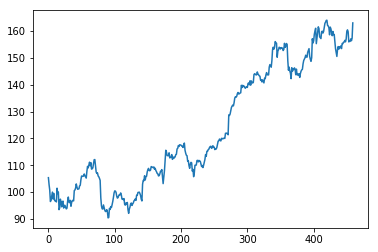

In [113]:
close_arr = apple['Close'].values
print(type(close_arr))

plt.plot(close_arr)
plt.show()

#### Ploting series (matplotlib)
- This will keep the dates 

<class 'pandas.core.series.Series'>


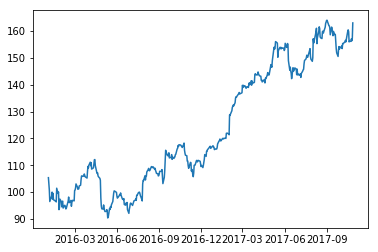

In [112]:
close_series = apple['Close']
print(type(close_series))

plt.plot(close_series)
plt.show()

#### Plotting series (pandas method)
- This does even nice formatting and labeling

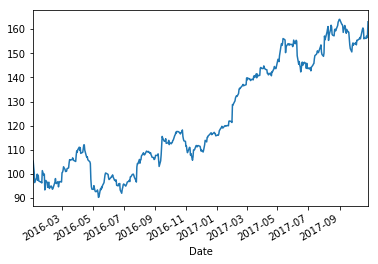

In [114]:
close_series.plot()
plt.show()

#### Plotting dataframes (matplotlib)
- you can do this, but its not as nice as the pandas version
- It does not have a legend and the date formatting is not as nice

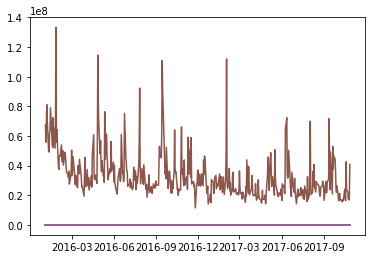

In [122]:
plt.plot(apple)
plt.show()

#### Plotting DataFrames (pandas)
- Just calling plot on the data frame will plot all of the series across the index
- Here the `volume` column takes over the plot

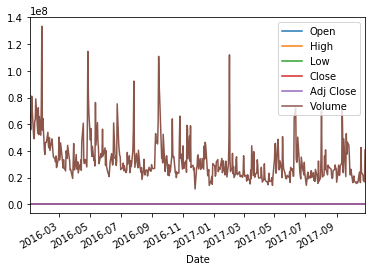

In [123]:
apple.plot()
plt.show()

We need to fix the scales

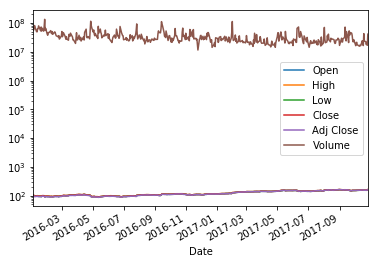

In [125]:
apple.plot()
plt.yscale('log')
plt.show()

Or we can customize the plot to just look at the 'open' and 'close' series

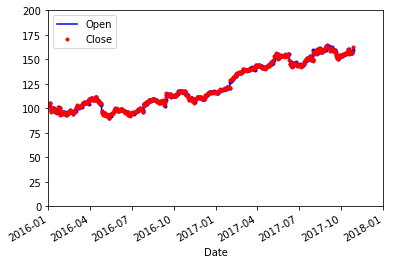

In [136]:
apple.Open.plot(
    color = 'b',
    style = '.-',
    legend = True)

apple.Close.plot(
    color = 'r',
    style = '.',
    legend = True)

plt.axis(('2016','2018', 0, 200))
plt.show()

#### Saving plots
- .jpg is not supported for some reason
- They have that version in the class though. 

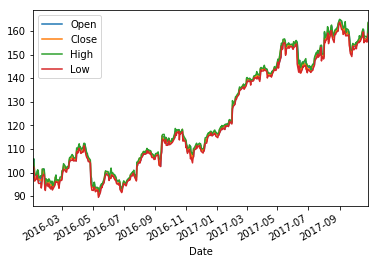

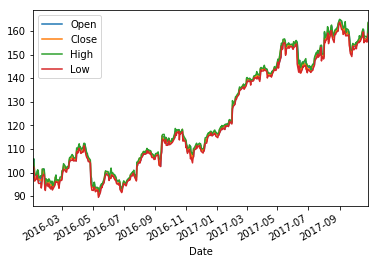

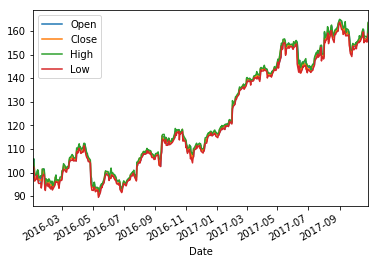

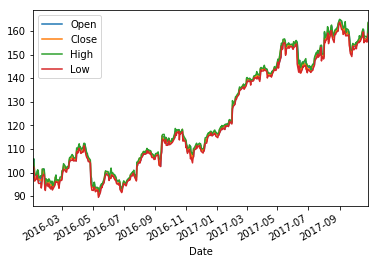

In [142]:
apple.loc[:,['Open','Close','High','Low']].plot()

plt.savefig('plots/apple_stock.png')
plt.savefig('plots/apple_stock.svg')
plt.savefig('plots/apple_stock.pdf')

plt.show()

### Plotting series using pandas
- Pandas provides data visualization by both depending upon and interoperating with the matplotlib library. 
- In the class we just have a month of data, but in the file provided its an entire year.
 - So, its hard to see the lines, it looks more like a ribbon. But I think it looks cool. 

In [144]:
df = pd.read_csv('https://assets.datacamp.com/production/course_1639/datasets/weather_data_austin_2010.csv')

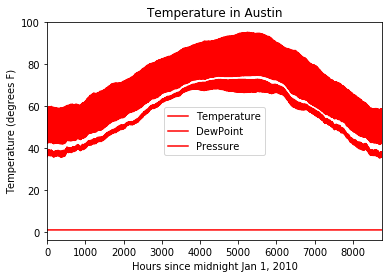

In [146]:
# Create a plot with color='red'
df.plot(color = 'red')

# Add a title
plt.title('Temperature in Austin')

# Specify the x-axis label
plt.xlabel('Hours since midnight Jan 1, 2010')

# Specify the y-axis label
plt.ylabel('Temperature (degrees F)')

# Display the plot
plt.show()

Let me try to just show a month so we can see the line move by hour

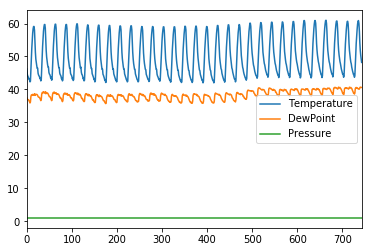

In [151]:
df.iloc[:744, :].plot()
plt.show()

### Plotting DataFrames

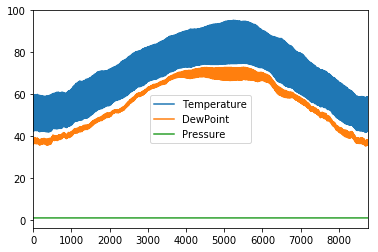

In [147]:
# Plot all columns (default)
df.plot()
plt.show()

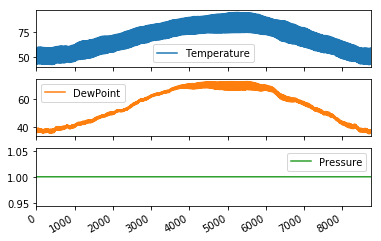

In [148]:
# Plot all columns as subplots
df.plot(subplots = True)
plt.show()

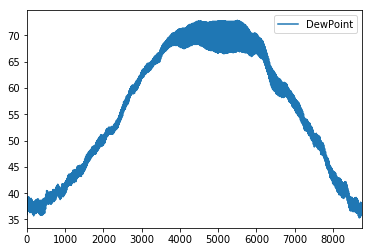

In [150]:
# Plot just the Dew Point data
column_list1 = ['DewPoint']
df[column_list1].plot()
plt.show()

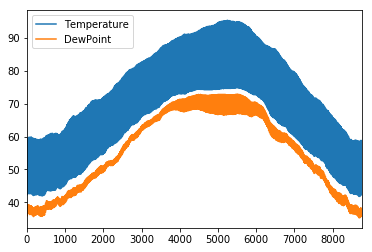

In [152]:
# Plot the Dew Point and Temperature data, but not the Pressure data
column_list2 = ['Temperature','DewPoint']
df[column_list2].plot()
plt.show()

# Exploratory data analysis

## Visual exploratory data analysis

#### Data import
- I am going to use sci kit learn to get the iris dataset to follow along with the video
- the sci kit learn data sets are pretty interesting. I'm exploring them here for the first time

In [330]:
from sklearn import datasets
iris = datasets.load_iris()

print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [331]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [332]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [333]:
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['species'])
iris.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0

In [334]:
iris['species'] = iris['species'].replace({0:'setosa', 1:'versicolor', 2:'virginica'})
iris.species.describe()

count           150
unique            3
top       virginica
freq             50
Name: species, dtype: object

In [336]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
species              150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


#### Line plot

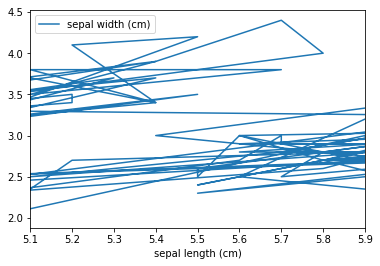

In [337]:
iris.plot(x = 'sepal length (cm)', y = 'sepal width (cm)')
plt.show()

Well, thats a mess and makes no sese.

#### Scatter plot

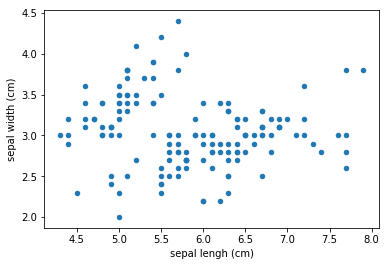

In [338]:
iris.plot(kind = 'scatter',
          x = 'sepal length (cm)', 
          y = 'sepal width (cm)')
plt.xlabel('sepal lengh (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

#### Box Plot

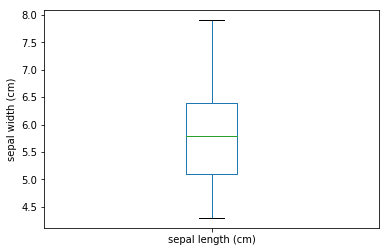

In [339]:
iris.plot(kind = 'box', y = 'sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

#### Histogram

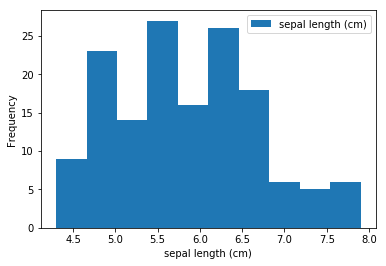

In [340]:
iris.plot(kind = 'hist', y = 'sepal length (cm)')
plt.xlabel('sepal length (cm)')
plt.show()

#### Histogram options
- **bins**(integer): number of intervals or bins
- **range** (tuple): extrema of bins (min, max)
- **normed** (boolean): whether to normalize to one
- **cumulative** (boolean): compute Cumulative Distribution Function (CDF)

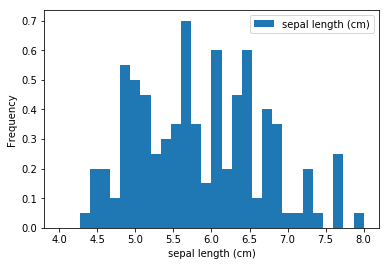

In [341]:
iris.plot(
    kind = 'hist',
    y = 'sepal length (cm)',
    bins = 30,
    range = (4,8),
    normed = True)

plt.xlabel('sepal length (cm)')
plt.show()

#### Cumulative distribution

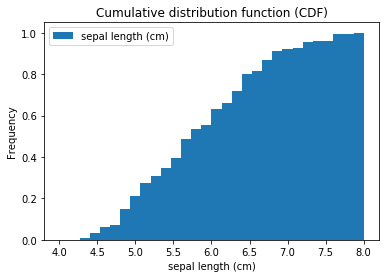

In [342]:
iris.plot(
    kind = 'hist',
    y = 'sepal length (cm)',
    bins = 30,
    range = (4,8),
    cumulative = True,
    normed = True)

plt.xlabel('sepal length (cm)')
plt.title('Cumulative distribution function (CDF)')
plt.show()

#### Word of warning
- Three different DataFrame plot idioms
 - iris.plot(kind = 'hist)
 - iris.plt.hist()
 - iris.hist()
- Syntax/results differ!

### pandas line plots

In [200]:
df = pd.DataFrame(
[['Jan', 117.160004, 534.5224450000002, 153.309998],
 ['Feb', 128.46000700000002, 558.402511, 161.940002],
 ['Mar', 124.43, 548.002468, 160.5],
 ['Apr', 125.150002, 537.340027, 171.28999299999995],
 ['May', 130.279999, 532.1099849999998, 169.649994],
 ['Jun', 125.43, 520.51001, 162.660004],
 ['Jul', 121.300003, 625.6099849999998, 161.990005],
 ['Aug', 112.760002, 618.25, 147.889999],
 ['Sep', 110.300003, 608.419983, 144.970001],
 ['Oct', 119.5, 710.8099980000002, 140.080002],
 ['Nov', 118.300003, 742.599976, 139.419998],
 ['Dec', 105.260002, 758.880005, 137.619995]],
columns = ['Month', 'AAPL', 'GOOG', 'IBM'])

df.head()

Month        AAPL        GOOG         IBM
0   Jan  117.160004  534.522445  153.309998
1   Feb  128.460007  558.402511  161.940002
2   Mar  124.430000  548.002468  160.500000
3   Apr  125.150002  537.340027  171.289993
4   May  130.279999  532.109985  169.649994

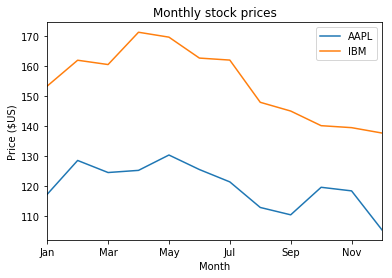

In [201]:
# Create a list of y-axis column names: y_columns
y_columns = ['AAPL','IBM']

# Generate a line plot
df.plot(x='Month', y=y_columns)

# Add the title
plt.title('Monthly stock prices')

# Add the y-axis label
plt.ylabel('Price ($US)')

# Display the plot
plt.show()


### pandas scatter plots
- First I need to load the cars data
- this comes form uci machine learnin library
- I use a nice regex move to get this to load correctly as the delim is either 3 spaces or a tab between differnt columns

In [368]:
file = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
col_names = ['mpg', 'cyl', 'displ', 'hp', 'weight', 'accel', 'yr', 'origin', 'name']
cars = pd.read_csv(file, sep = r"\s+", names = col_names, na_values = '?')
print(cars.info())
cars.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg       398 non-null float64
cyl       398 non-null int64
displ     398 non-null float64
hp        392 non-null float64
weight    398 non-null float64
accel     398 non-null float64
yr        398 non-null int64
origin    398 non-null int64
name      398 non-null object
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB
None


mpg  cyl  displ     hp  weight  accel  yr  origin  \
0  18.0    8  307.0  130.0  3504.0   12.0  70       1   
1  15.0    8  350.0  165.0  3693.0   11.5  70       1   
2  18.0    8  318.0  150.0  3436.0   11.0  70       1   
3  16.0    8  304.0  150.0  3433.0   12.0  70       1   
4  17.0    8  302.0  140.0  3449.0   10.5  70       1   

                        name  
0  chevrolet chevelle malibu  
1          buick skylark 320  
2         plymouth satellite  
3              amc rebel sst  
4                ford torino

I also need to create the sizes array which is the weight of th car normalized

In [369]:
min = cars.weight.min(axis = 0)
max = cars.weight.max(axis = 0)

sizes = (cars.weight - min)/(max - min) * 100

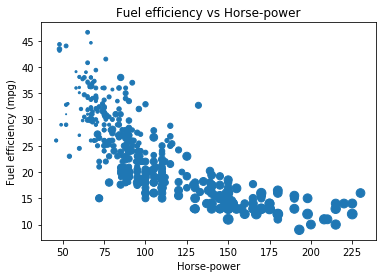

In [370]:
# Generate a scatter plot
cars.plot(
    kind = 'scatter', 
    x = 'hp', 
    y = 'mpg', 
    s = sizes)

# Add the title
plt.title('Fuel efficiency vs Horse-power')

# Add the x-axis label
plt.xlabel('Horse-power')

# Add the y-axis label
plt.ylabel('Fuel efficiency (mpg)')

# Display the plot
plt.show()


### pandas box plots

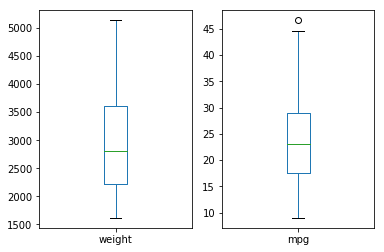

In [371]:
# Make a list of the column names to be plotted: cols
cols = ['weight','mpg']

# Generate the box plots
cars[cols].plot(kind = 'box', subplots = True)

# Display the plot
plt.show()

### pandas hist, pdf and cdf

In [238]:
tips = sns.load_dataset("tips")
tips['fraction'] = tips.tip / tips.total_bill
tips.head()

total_bill   tip     sex smoker  day    time  size  fraction
0       16.99  1.01  Female     No  Sun  Dinner     2  0.059447
1       10.34  1.66    Male     No  Sun  Dinner     3  0.160542
2       21.01  3.50    Male     No  Sun  Dinner     3  0.166587
3       23.68  3.31    Male     No  Sun  Dinner     2  0.139780
4       24.59  3.61  Female     No  Sun  Dinner     4  0.146808

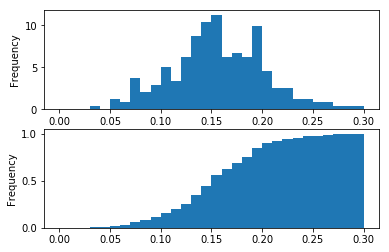

In [248]:
# This formats the plots such that they appear on separate rows
fig, axes = plt.subplots(nrows=2, ncols=1)

# Plot the PDF
tips.fraction.plot(
    ax = axes[0], 
    kind = 'hist', 
    normed = True,
    bins = 30, 
    range = (0,.3))

# Plot the CDF
tips.fraction.plot(
    ax = axes[1], 
    kind = 'hist', 
    bins = 30, 
    normed = True, 
    cumulative = True, 
    range = (0,.3))

plt.show()


## Statistical exploratory data analysis

#### Summarizing with describe()

In [249]:
iris.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.054000           3.758667   
std             0.828066          0.433594           1.764420   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.198667  
std            0.763161  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000

#### Counts

In [250]:
iris['sepal length (cm)'].count()

150

In [252]:
iris[['sepal length (cm)', 'petal width (cm)']].count()

sepal length (cm)    150
petal width (cm)     150
dtype: int64

In [253]:
type(iris[['sepal length (cm)', 'petal width (cm)']].count())

pandas.core.series.Series

In [256]:
iris.count()

sepal length (cm)    150
sepal width (cm)     150
petal length (cm)    150
petal width (cm)     150
dtype: int64

#### Averages
- All of these methods ignore null entries by default

In [254]:
iris['sepal length (cm)'].mean()

5.8433333333333337

In [257]:
iris.mean()

sepal length (cm)    5.843333
sepal width (cm)     3.054000
petal length (cm)    3.758667
petal width (cm)     1.198667
dtype: float64

#### Standard deviations

In [258]:
iris.std()

sepal length (cm)    0.828066
sepal width (cm)     0.433594
petal length (cm)    1.764420
petal width (cm)     0.763161
dtype: float64

#### Medians

In [259]:
iris.median()

sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
dtype: float64

#### Medians & 0.5 quantiles

In [260]:
iris.median()

sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
dtype: float64

In [261]:
q = 0.5
iris.quantile(q)

sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
Name: 0.5, dtype: float64

In [263]:
q = [.25, .75]
iris.quantile(q)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0.25                5.1               2.8                1.6               0.3
0.75                6.4               3.3                5.1               1.8

#### Ranges

In [264]:
iris.min()

sepal length (cm)    4.3
sepal width (cm)     2.0
petal length (cm)    1.0
petal width (cm)     0.1
dtype: float64

In [265]:
iris.max()

sepal length (cm)    7.9
sepal width (cm)     4.4
petal length (cm)    6.9
petal width (cm)     2.5
dtype: float64

#### Box plots
- The box plot shows the same percentiles reported by `describe()`

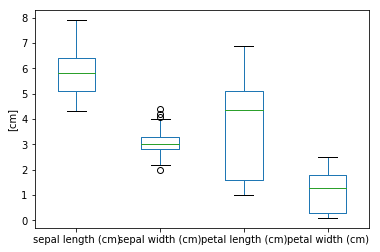

In [266]:
iris.plot(kind = 'box')
plt.ylabel('[cm]')
plt.show()

### Fuel efficiency

In [277]:
cars.median()

mpg         23.0
cyl          4.0
displ      148.5
hp          93.5
weight    2803.5
accel       15.5
yr          76.0
origin       1.0
dtype: float64

### Bachelor's degrees awarded to women

In [278]:
file = 'https://assets.datacamp.com/production/course_1639/datasets/percent-bachelors-degrees-women-usa.csv'
women = pd.read_csv(file)
women.head()

Year  Agriculture  Architecture  Art and Performance    Biology   Business  \
0  1970     4.229798     11.921005                 59.7  29.088363   9.064439   
1  1971     5.452797     12.003106                 59.9  29.394403   9.503187   
2  1972     7.420710     13.214594                 60.4  29.810221  10.558962   
3  1973     9.653602     14.791613                 60.2  31.147915  12.804602   
4  1974    14.074623     17.444688                 61.9  32.996183  16.204850   

   Communications and Journalism  Computer Science  Education  Engineering  \
0                           35.3              13.6  74.535328          0.8   
1                           35.5              13.6  74.149204          1.0   
2                           36.6              14.9  73.554520          1.2   
3                           38.4              16.4  73.501814          1.6   
4                           40.5              18.9  73.336811          2.2   

     English  Foreign Languages  Health Professions  Math and Statistics  \
0  65.570923               73.8                77.1                 38.0   
1  64.556485               73.9                75.5                 39.0   
2  63.664263               74.6                76.9                 40.2   
3  62.941502               74.9                77.4                 40.9   
4  62.413412               75.3                77.9                 41.8   

   Physical Sciences  Psychology  Public Administration  \
0               13.8        44.4                   68.4   
1               14.9        46.2                   65.5   
2               14.8        47.6                   62.6   
3               16.5        50.4                   64.3   
4               18.2        52.6                   66.1   

   Social Sciences and History  
0                         36.8  
1                         36.2  
2                         36.1  
3                         36.4  
4                         37.3

0.8
19.0


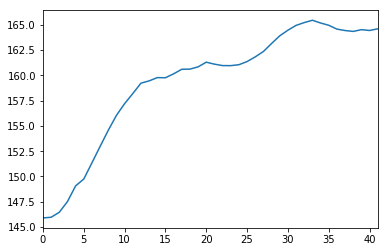

In [279]:
# Print the minimum value of the Engineering column
print(women['Engineering'].min())

# Print the maximum value of the Engineering column
print(women['Engineering'].max())

# Construct the mean percentage per year: mean
mean = women.mean(axis = 'columns')

# Plot the average percentage per year
mean.plot()

# Display the plot
plt.show()


### Median vs mean

In [280]:
file = 'https://assets.datacamp.com/production/course_1639/datasets/titanic.csv'
titanic = pd.read_csv(file)
titanic.head()

pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

     age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.00      0      0   24160  211.3375       B5        S    2    NaN   
1   0.92      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.00      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64


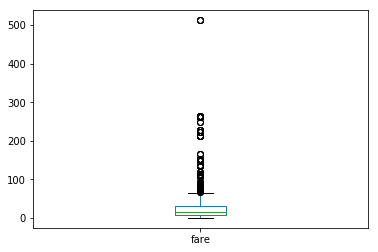

In [281]:
# Print summary statistics of the fare column with .describe()
print(titanic.fare.describe())

# Generate a box plot of the fare column
titanic.fare.plot(kind = 'box')

# Show the plot
plt.show()


### Quantiles

In [285]:
file = 'https://assets.datacamp.com/production/course_1639/datasets/life_expectancy_at_birth.csv'
gapminder = pd.read_csv(file, index_col = 0)
print(gapminder.info())
gapminder.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 0 to 259
Columns: 218 entries, Life expectancy to 2016
dtypes: float64(217), object(1)
memory usage: 444.8+ KB
None


Life expectancy   1800   1801   1802   1803   1804   1805   1806  \
0               Abkhazia    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1            Afghanistan  28.21  28.20  28.19  28.18  28.17  28.16  28.15   
2  Akrotiri and Dhekelia    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3                Albania  35.40  35.40  35.40  35.40  35.40  35.40  35.40   
4                Algeria  28.82  28.82  28.82  28.82  28.82  28.82  28.82   

    1807   1808  ...    2007  2008  2009  2010  2011  2012  2013  2014  2015  \
0    NaN    NaN  ...     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1  28.14  28.13  ...    52.4  52.8  53.3  53.6  54.0  54.4  54.8  54.9  53.8   
2    NaN    NaN  ...     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3  35.40  35.40  ...    76.6  76.8  77.0  77.2  77.4  77.5  77.7  77.9  78.0   
4  28.82  28.82  ...    75.3  75.5  75.7  76.0  76.1  76.2  76.3  76.3  76.4   

    2016  
0    NaN  
1  52.72  
2    NaN  
3  78.10  
4  76.50  

[5 rows x 218 columns]

In [287]:
# Print the number of countries reported in 2015
print(gapminder['2015'].count())

208


In [288]:
# Print the 5th and 95th percentiles
print(gapminder.quantile([0.05,0.95]))

       1800   1801   1802  1803  1804   1805   1806   1807  1808  1809  \
0.05  25.40  25.30  25.20  25.2  25.2  25.40  25.40  25.40  25.3  25.3   
0.95  37.92  37.35  38.37  38.0  38.3  38.37  38.37  38.37  38.0  38.0   

       ...      2007   2008    2009    2010   2011    2012    2013   2014  \
0.05   ...     53.07  53.60  54.235  54.935  55.97  56.335  56.705  56.87   
0.95   ...     80.73  80.93  81.200  81.365  81.60  81.665  81.830  82.00   

        2015     2016  
0.05  57.855  59.2555  
0.95  82.100  82.1650  

[2 rows x 217 columns]


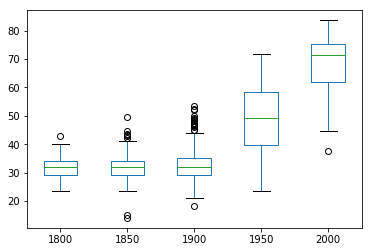

In [289]:
# Generate a box plot
years = ['1800','1850','1900','1950','2000']
gapminder[years].plot(kind='box')
plt.show()

### Standard deviation of temperature

In [291]:
january = pd.DataFrame(
[['2013-01-01', 28],
 ['2013-01-02', 21],
 ['2013-01-03', 24],
 ['2013-01-04', 28],
 ['2013-01-05', 30],
 ['2013-01-06', 34],
 ['2013-01-07', 29],
 ['2013-01-08', 31],
 ['2013-01-09', 36],
 ['2013-01-10', 34],
 ['2013-01-11', 47],
 ['2013-01-12', 55],
 ['2013-01-13', 62],
 ['2013-01-14', 44],
 ['2013-01-15', 30],
 ['2013-01-16', 32],
 ['2013-01-17', 32],
 ['2013-01-18', 24],
 ['2013-01-19', 42],
 ['2013-01-20', 35],
 ['2013-01-21', 18],
 ['2013-01-22', 9],
 ['2013-01-23', 11],
 ['2013-01-24', 16],
 ['2013-01-25', 16],
 ['2013-01-26', 23],
 ['2013-01-27', 23],
 ['2013-01-28', 40],
 ['2013-01-29', 59],
 ['2013-01-30', 58],
 ['2013-01-31', 32]],
 columns = ['Date','Temperature'])

january.head()

Date  Temperature
0  2013-01-01           28
1  2013-01-02           21
2  2013-01-03           24
3  2013-01-04           28
4  2013-01-05           30

In [292]:
march = pd.DataFrame(
[['2013-03-01', 28],
 ['2013-03-02', 26],
 ['2013-03-03', 24],
 ['2013-03-04', 28],
 ['2013-03-05', 32],
 ['2013-03-06', 34],
 ['2013-03-07', 36],
 ['2013-03-08', 32],
 ['2013-03-09', 40],
 ['2013-03-10', 55],
 ['2013-03-11', 55],
 ['2013-03-12', 40],
 ['2013-03-13', 32],
 ['2013-03-14', 30],
 ['2013-03-15', 38],
 ['2013-03-16', 36],
 ['2013-03-17', 32],
 ['2013-03-18', 34],
 ['2013-03-19', 36],
 ['2013-03-20', 32],
 ['2013-03-21', 22],
 ['2013-03-22', 28],
 ['2013-03-23', 34],
 ['2013-03-24', 34],
 ['2013-03-25', 32],
 ['2013-03-26', 34],
 ['2013-03-27', 34],
 ['2013-03-28', 37],
 ['2013-03-29', 43],
 ['2013-03-30', 43],
 ['2013-03-31', 44]],
 columns = ['Date','Temperature'])

march.head()

Date  Temperature
0  2013-03-01           28
1  2013-03-02           26
2  2013-03-03           24
3  2013-03-04           28
4  2013-03-05           32

In [295]:
# Print the mean of the January and March data
print(january.mean(), march.mean())

print('---------------')

# Print the standard deviation of the January and March data
print(january.std(), march.std())

Temperature    32.354839
dtype: float64 Temperature    35.0
dtype: float64
---------------
Temperature    13.583196
dtype: float64 Temperature    7.478859
dtype: float64


## Separating populations with Boolean indexing

In [343]:
iris.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa

In [345]:
iris['species'].describe()

count           150
unique            3
top       virginica
freq             50
Name: species, dtype: object

In [346]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

#### Filtering by species

In [348]:
setosa = iris.loc[iris['species'] == 'setosa', :]
versicolor = iris.loc[iris['species'] == 'versicolor', :]
virginica = iris.loc[iris['species'] == 'virginica', :]

In [350]:
# Checking
print(setosa['species'].unique())
print(versicolor['species'].unique())
print(virginica['species'].unique())

['setosa']
['versicolor']
['virginica']


In [351]:
# Now we can delete the species column from each of these daaframes
del setosa['species'], versicolor['species'], virginica['species']

#### Visial EDA: all data

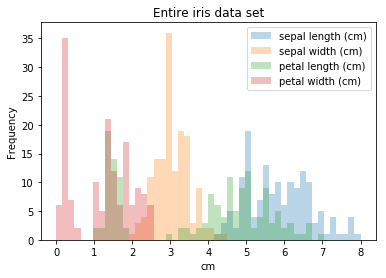

In [352]:
iris.plot(
    kind = 'hist',
    bins = 50,
    range = (0,8), 
    alpha = 0.3)

plt.title('Entire iris data set')
plt.xlabel('cm')
plt.show()

#### Visual EDA: individual factors

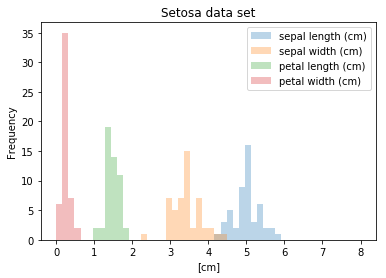

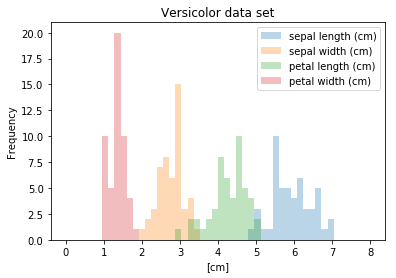

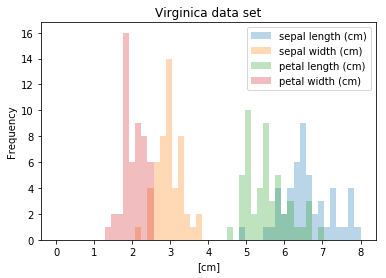

In [353]:
setosa.plot(
    kind = 'hist',
    bins = 50,
    range = (0,8), 
    alpha = 0.3)

plt.title('Setosa data set')
plt.xlabel('[cm]')

versicolor.plot(
    kind = 'hist',
    bins = 50,
    range = (0,8), 
    alpha = 0.3)

plt.title('Versicolor data set')
plt.xlabel('[cm]')

virginica.plot(
    kind = 'hist',
    bins = 50,
    range = (0,8), 
    alpha = 0.3)

plt.title('Virginica data set')
plt.xlabel('[cm]')

plt.show()

#### Statistical EDA: describe()
- Apparently using describe on the entire dataset leads to `quantatative erros`
- Hmmm, this is not really an error. Its just the **difference** between the statistics of the individual species vs all 3 species together. He should not be calling this an 'error'.

In [354]:
describe_all = iris.describe()
describe_setosa = setosa.describe()
describe_versicolor = versicolor.describe()
describe_virginica = virginica.describe()

In [356]:
error_setosa = 100 * np.abs(describe_setosa - describe_all)/describe_setosa
error_versicolor = 100 * np.abs(describe_versicolor - describe_all)/describe_versicolor
error_virginica = 100 * np.abs(describe_virginica - describe_all)/describe_virginica

print(error_setosa)

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         200.000000        200.000000         200.000000   
mean           16.726595         10.649503         156.739526   
std           134.919250         13.796994         916.891608   
min             0.000000         13.043478           0.000000   
25%             6.250000         10.400000          14.285714   
50%            16.000000         11.764706         190.000000   
75%            23.076923         10.204082         223.809524   
max            36.206897          0.000000         263.157895   

       petal width (cm)  
count        200.000000  
mean         391.256831  
std          611.840574  
min            0.000000  
25%           50.000000  
50%          550.000000  
75%          500.000000  
max          316.666667  


### Filtering and counting
- How many cars were made in Asia?
- First I need to convert the numbers to their proper country/continent names

In [372]:
cars['origin'] = cars['origin'].replace({1:'US', 2:'Europe', 3:'Asia'})
cars.origin.unique()

array(['US', 'Asia', 'Europe'], dtype=object)

In [374]:
cars[cars['origin'] == 'Asia'].count()

mpg       79
cyl       79
displ     79
hp        79
weight    79
accel     79
yr        79
origin    79
name      79
dtype: int64

### Separate and summarize
- How do the automobiles in the US differ from the global average and standard deviation. 
- How does the distribution of fuel efficiency (MPG) for the US differ from the global average and standard deviation?

In [376]:
# Compute the global mean and global standard deviation: global_mean, global_std
global_mean = cars.mean()
global_std = cars.std()

# Filter the US population from the origin column: us
us = cars[cars['origin'] == 'US']

# Compute the US mean and US standard deviation: us_mean, us_std
us_mean = us.mean()
us_std = us.std()

# Print the differences
print(us_mean - global_mean)
print('----------')
print(us_std - global_std)

mpg        -3.431039
cyl         0.794222
displ      52.475727
hp         14.579592
weight    391.507104
accel      -0.534356
yr         -0.399608
dtype: float64
----------
mpg       -1.413092
cyl       -0.039580
displ     -5.767999
hp         1.406630
weight   -52.049268
accel     -0.006577
yr        -0.020533
dtype: float64


### Separate and plot

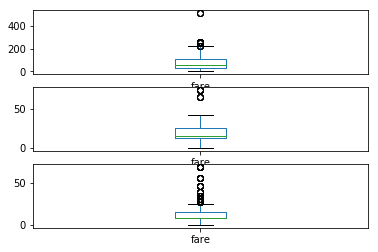

In [380]:
# Display the box plots on 3 separate rows and 1 column
fig, axes = plt.subplots(nrows=3, ncols=1)

# Generate a box plot of the fare prices for the First passenger class
titanic.loc[titanic['pclass'] == 1].plot(ax=axes[0], y='fare', kind='box')

# Generate a box plot of the fare prices for the Second passenger class
titanic.loc[titanic['pclass'] == 2].plot(ax=axes[1], y='fare', kind ='box')

# Generate a box plot of the fare prices for the Third passenger class
titanic.loc[titanic['pclass'] == 3].plot(ax=axes[2], y='fare', kind
='box')

# Display the plot
plt.show()


# Time series in pandas

## Indexing pandas time series

#### Using pandas to read datetime objects
- read_csv() function
 - can read string into datetime objects
 - need to specify `parse_dates=True`
- ISO 8601 format
 - yyyy-mm-dd hh:mm:ss
- set the date column to be in the index with `index_col = 'Date'`

In [387]:
file = 'https://assets.datacamp.com/production/course_1639/datasets/sales-feb-2015.csv'
sales = pd.read_csv(file, parse_dates = True, index_col = 'Date')
print(sales.info())
sales.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19 entries, 2015-02-02 08:30:00 to 2015-02-26 09:00:00
Data columns (total 3 columns):
Company    19 non-null object
Product    19 non-null object
Units      19 non-null int64
dtypes: int64(1), object(2)
memory usage: 608.0+ bytes
None


Company   Product  Units
Date                                                 
2015-02-02 08:30:00            Hooli  Software      3
2015-02-02 21:00:00        Mediacore  Hardware      9
2015-02-03 14:00:00          Initech  Software     13
2015-02-04 15:30:00        Streeplex  Software     13
2015-02-04 22:00:00  Acme Coporation  Hardware     14

#### Selecting datetimes

In [388]:
# single datetime
sales.loc['2015-02-19 11:00:00', 'Company']

'Mediacore'

In [390]:
# whole day (partial string selection)
sales.loc['2015-2-5']

Company   Product  Units
Date                                                 
2015-02-05 02:00:00  Acme Coporation  Software     19
2015-02-05 22:00:00            Hooli   Service     10

In [391]:
# Other partial string selection options
print(sales.loc['February 5, 2015'])
print(sales.loc['2015-Feb-5'])

                             Company   Product  Units
Date                                                 
2015-02-05 02:00:00  Acme Coporation  Software     19
2015-02-05 22:00:00            Hooli   Service     10
                             Company   Product  Units
Date                                                 
2015-02-05 02:00:00  Acme Coporation  Software     19
2015-02-05 22:00:00            Hooli   Service     10


In [392]:
# You can also select the entire month or year
sales.loc['2015-2']

Company   Product  Units
Date                                                 
2015-02-02 08:30:00            Hooli  Software      3
2015-02-02 21:00:00        Mediacore  Hardware      9
2015-02-03 14:00:00          Initech  Software     13
2015-02-04 15:30:00        Streeplex  Software     13
2015-02-04 22:00:00  Acme Coporation  Hardware     14
2015-02-05 02:00:00  Acme Coporation  Software     19
2015-02-05 22:00:00            Hooli   Service     10
2015-02-07 23:00:00  Acme Coporation  Hardware      1
2015-02-09 09:00:00        Streeplex   Service     19
2015-02-09 13:00:00        Mediacore  Software      7
2015-02-11 20:00:00          Initech  Software      7
2015-02-11 23:00:00            Hooli  Software      4
2015-02-16 12:00:00            Hooli  Software     10
2015-02-19 11:00:00        Mediacore  Hardware     16
2015-02-19 16:00:00        Mediacore   Service     10
2015-02-21 05:00:00        Mediacore  Software      3
2015-02-21 20:30:00            Hooli  Hardware      3
2015-02-25 00:30:00          Initech   Service     10
2015-02-26 09:00:00        Streeplex   Service      4

In [393]:
sales.loc['2015']

Company   Product  Units
Date                                                 
2015-02-02 08:30:00            Hooli  Software      3
2015-02-02 21:00:00        Mediacore  Hardware      9
2015-02-03 14:00:00          Initech  Software     13
2015-02-04 15:30:00        Streeplex  Software     13
2015-02-04 22:00:00  Acme Coporation  Hardware     14
2015-02-05 02:00:00  Acme Coporation  Software     19
2015-02-05 22:00:00            Hooli   Service     10
2015-02-07 23:00:00  Acme Coporation  Hardware      1
2015-02-09 09:00:00        Streeplex   Service     19
2015-02-09 13:00:00        Mediacore  Software      7
2015-02-11 20:00:00          Initech  Software      7
2015-02-11 23:00:00            Hooli  Software      4
2015-02-16 12:00:00            Hooli  Software     10
2015-02-19 11:00:00        Mediacore  Hardware     16
2015-02-19 16:00:00        Mediacore   Service     10
2015-02-21 05:00:00        Mediacore  Software      3
2015-02-21 20:30:00            Hooli  Hardware      3
2015-02-25 00:30:00          Initech   Service     10
2015-02-26 09:00:00        Streeplex   Service      4

#### Slicing dates/times

In [394]:
# give a start and stop
sales.loc['2015-2-16':'2015-2-20']

Company   Product  Units
Date                                           
2015-02-16 12:00:00      Hooli  Software     10
2015-02-19 11:00:00  Mediacore  Hardware     16
2015-02-19 16:00:00  Mediacore   Service     10

#### Convert strings to datetime

In [396]:
evening_2_11 = pd.to_datetime(['2015-2-11 20:00','2015-2-11 21:00','2015-2-11 22:00','2015-2-11 23:00'])
evening_2_11 

DatetimeIndex(['2015-02-11 20:00:00', '2015-02-11 21:00:00',
               '2015-02-11 22:00:00', '2015-02-11 23:00:00'],
              dtype='datetime64[ns]', freq=None)

#### Reindexing DataFrame
- This will keep values from sales where the index matches the times in evening_2_11
- All values from eveing_2_11 will be there, some may be empty with NaN

In [397]:
sales.reindex(evening_2_11)

Company   Product  Units
2015-02-11 20:00:00  Initech  Software    7.0
2015-02-11 21:00:00      NaN       NaN    NaN
2015-02-11 22:00:00      NaN       NaN    NaN
2015-02-11 23:00:00    Hooli  Software    4.0

#### Filling mising values
- its useful to fill in the NaNs sometimes with the nearet value forward or backward. 

In [398]:
sales.reindex(evening_2_11, method = 'ffill')

Company   Product  Units
2015-02-11 20:00:00  Initech  Software      7
2015-02-11 21:00:00  Initech  Software      7
2015-02-11 22:00:00  Initech  Software      7
2015-02-11 23:00:00    Hooli  Software      4

In [399]:
sales.reindex(evening_2_11, method = 'bfill')

Company   Product  Units
2015-02-11 20:00:00  Initech  Software      7
2015-02-11 21:00:00    Hooli  Software      4
2015-02-11 22:00:00    Hooli  Software      4
2015-02-11 23:00:00    Hooli  Software      4

### Creating and using a DatetimeIndex

In [400]:
weather = pd.read_csv('https://assets.datacamp.com/production/course_1639/datasets/weather_data_austin_2010.csv')
weather.head()

Temperature  DewPoint  Pressure            Date
0         46.2      37.5       1.0  20100101 00:00
1         44.6      37.1       1.0  20100101 01:00
2         44.1      36.9       1.0  20100101 02:00
3         43.8      36.9       1.0  20100101 03:00
4         43.5      36.8       1.0  20100101 04:00

In [402]:
date_list = weather.Date
type(date_list)

pandas.core.series.Series

In [410]:
temp_list = weather.Temperature.values.tolist()
type(temp_list)

list

In [414]:
# Prepare a format string: time_format
time_format = '%Y-%m-%d %H:%M'

# Convert date_list into a datetime object: my_datetimes
my_datetimes = pd.to_datetime(date_list, format=time_format)
print(my_datetimes.head())
print(my_datetimes.tail())

0   2010-01-01 00:00:00
1   2010-01-01 01:00:00
2   2010-01-01 02:00:00
3   2010-01-01 03:00:00
4   2010-01-01 04:00:00
Name: Date, dtype: datetime64[ns]
8754   2010-12-31 19:00:00
8755   2010-12-31 20:00:00
8756   2010-12-31 21:00:00
8757   2010-12-31 22:00:00
8758   2010-12-31 23:00:00
Name: Date, dtype: datetime64[ns]


In [412]:
# Construct a pandas Series using temperature_list and my_datetimes: time_series
time_series = pd.Series(temp_list, index=my_datetimes)
time_series.head()

Date
2010-01-01 00:00:00    46.2
2010-01-01 01:00:00    44.6
2010-01-01 02:00:00    44.1
2010-01-01 03:00:00    43.8
2010-01-01 04:00:00    43.5
dtype: float64

### Partial string indexing and slicing

In [416]:
# Extract the hour from 9pm to 10pm on '2010-10-11': ts1
ts1 = time_series.loc['2010-10-11 21:00:00']
ts1

69.0

In [418]:
# Extract '2010-07-04' from ts0: ts2
ts2 = time_series.loc['2010-07-04']
ts2

Date
2010-07-04 00:00:00    77.6
2010-07-04 01:00:00    76.3
2010-07-04 02:00:00    75.5
2010-07-04 03:00:00    74.9
2010-07-04 04:00:00    74.6
2010-07-04 05:00:00    74.2
2010-07-04 06:00:00    74.4
2010-07-04 07:00:00    76.0
2010-07-04 08:00:00    79.0
2010-07-04 09:00:00    81.8
2010-07-04 10:00:00    84.6
2010-07-04 11:00:00    86.8
2010-07-04 12:00:00    88.9
2010-07-04 13:00:00    90.1
2010-07-04 14:00:00    91.1
2010-07-04 15:00:00    91.6
2010-07-04 16:00:00    91.5
2010-07-04 17:00:00    90.7
2010-07-04 18:00:00    89.5
2010-07-04 19:00:00    87.3
2010-07-04 20:00:00    84.0
2010-07-04 21:00:00    81.8
2010-07-04 22:00:00    80.0
2010-07-04 23:00:00    78.5
dtype: float64

In [419]:
# Extract data from '2010-12-15' to '2010-12-31': ts3
ts3 = time_series.loc['2010-12-15':'2010-12-31']
print(ts3.head())
print(ts3.tail())

Date
2010-12-15 00:00:00    48.0
2010-12-15 01:00:00    47.2
2010-12-15 02:00:00    46.5
2010-12-15 03:00:00    46.0
2010-12-15 04:00:00    45.6
dtype: float64
Date
2010-12-31 19:00:00    51.1
2010-12-31 20:00:00    49.0
2010-12-31 21:00:00    47.9
2010-12-31 22:00:00    46.9
2010-12-31 23:00:00    46.2
dtype: float64


### Reindexing the Index

#### Create the data set

In [425]:
ts1_time = pd.date_range(start="2016-07-01 00:00:00", end="2016-07-17 00:00:00")
ts1_time

DatetimeIndex(['2016-07-01', '2016-07-02', '2016-07-03', '2016-07-04',
               '2016-07-05', '2016-07-06', '2016-07-07', '2016-07-08',
               '2016-07-09', '2016-07-10', '2016-07-11', '2016-07-12',
               '2016-07-13', '2016-07-14', '2016-07-15', '2016-07-16',
               '2016-07-17'],
              dtype='datetime64[ns]', freq='D')

In [428]:
ts1_temp = list(range(0,17))
ts1_temp

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [429]:
ts1 = pd.Series(ts1_temp, index=ts1_time)
ts1.head()

2016-07-01    0
2016-07-02    1
2016-07-03    2
2016-07-04    3
2016-07-05    4
Freq: D, dtype: int64

In [431]:
ts2_time = pd.to_datetime(
['2016-07-01 00:00:00',
 '2016-07-04 00:00:00',
 '2016-07-05 00:00:00',
 '2016-07-06 00:00:00',
 '2016-07-07 00:00:00',
 '2016-07-08 00:00:00',
 '2016-07-11 00:00:00',
 '2016-07-12 00:00:00',
 '2016-07-13 00:00:00',
 '2016-07-14 00:00:00',
 '2016-07-15 00:00:00'],
format = '%Y-%m-%d %H:%M:%S')

ts2_time

DatetimeIndex(['2016-07-01', '2016-07-04', '2016-07-05', '2016-07-06',
               '2016-07-07', '2016-07-08', '2016-07-11', '2016-07-12',
               '2016-07-13', '2016-07-14', '2016-07-15'],
              dtype='datetime64[ns]', freq=None)

In [433]:
ts2 = pd.Series(list(range(0,11)), index = ts2_time)
ts2.head()

2016-07-01    0
2016-07-04    1
2016-07-05    2
2016-07-06    3
2016-07-07    4
dtype: int64

#### Exercise

In [435]:
# Reindex without fill method: ts3
ts3 = ts2.reindex(ts1.index)
ts3

2016-07-01     0.0
2016-07-02     NaN
2016-07-03     NaN
2016-07-04     1.0
2016-07-05     2.0
2016-07-06     3.0
2016-07-07     4.0
2016-07-08     5.0
2016-07-09     NaN
2016-07-10     NaN
2016-07-11     6.0
2016-07-12     7.0
2016-07-13     8.0
2016-07-14     9.0
2016-07-15    10.0
2016-07-16     NaN
2016-07-17     NaN
Freq: D, dtype: float64

In [436]:
# Reindex with fill method, using forward fill: ts4
ts4 = ts2.reindex(ts1.index, method = 'ffill')
ts4

2016-07-01     0
2016-07-02     0
2016-07-03     0
2016-07-04     1
2016-07-05     2
2016-07-06     3
2016-07-07     4
2016-07-08     5
2016-07-09     5
2016-07-10     5
2016-07-11     6
2016-07-12     7
2016-07-13     8
2016-07-14     9
2016-07-15    10
2016-07-16    10
2016-07-17    10
Freq: D, dtype: int64

In [437]:
# Combine ts1 + ts2: sum12
sum12 = ts1 + ts2
sum12

2016-07-01     0.0
2016-07-02     NaN
2016-07-03     NaN
2016-07-04     4.0
2016-07-05     6.0
2016-07-06     8.0
2016-07-07    10.0
2016-07-08    12.0
2016-07-09     NaN
2016-07-10     NaN
2016-07-11    16.0
2016-07-12    18.0
2016-07-13    20.0
2016-07-14    22.0
2016-07-15    24.0
2016-07-16     NaN
2016-07-17     NaN
dtype: float64

In [438]:
# Combine ts1 + ts3: sum13
sum13 = ts1 + ts3
sum13

2016-07-01     0.0
2016-07-02     NaN
2016-07-03     NaN
2016-07-04     4.0
2016-07-05     6.0
2016-07-06     8.0
2016-07-07    10.0
2016-07-08    12.0
2016-07-09     NaN
2016-07-10     NaN
2016-07-11    16.0
2016-07-12    18.0
2016-07-13    20.0
2016-07-14    22.0
2016-07-15    24.0
2016-07-16     NaN
2016-07-17     NaN
Freq: D, dtype: float64

In [439]:
# Combine ts1 + ts4: sum14
sum14 = ts1 + ts4
sum14

2016-07-01     0
2016-07-02     1
2016-07-03     2
2016-07-04     4
2016-07-05     6
2016-07-06     8
2016-07-07    10
2016-07-08    12
2016-07-09    13
2016-07-10    14
2016-07-11    16
2016-07-12    18
2016-07-13    20
2016-07-14    22
2016-07-15    24
2016-07-16    25
2016-07-17    26
Freq: D, dtype: int64

## Resampling pandas time series

#### Resampling
- Statistical methods over different time intervals
 - mean, sum, count, etc
- Downsampling
 - reduce datetime rows to slower frequency (like grabbing a daily or weekly average)
- Upsampling
 - increase datetime rows to faster frequency (life filling in total dollars sold by 4 hour intervals)

In [441]:
sales.head()

Company   Product  Units
Date                                                 
2015-02-02 08:30:00            Hooli  Software      3
2015-02-02 21:00:00        Mediacore  Hardware      9
2015-02-03 14:00:00          Initech  Software     13
2015-02-04 15:30:00        Streeplex  Software     13
2015-02-04 22:00:00  Acme Coporation  Hardware     14

#### Aggregating means
- resample needs a string to indecate the time frequency
- its best practice to chain a statistic method on resample

In [444]:
daily_mean = sales.resample('D').mean()
daily_mean

Units
Date             
2015-02-02    6.0
2015-02-03   13.0
2015-02-04   13.5
2015-02-05   14.5
2015-02-06    NaN
2015-02-07    1.0
2015-02-08    NaN
2015-02-09   13.0
2015-02-10    NaN
2015-02-11    5.5
2015-02-12    NaN
2015-02-13    NaN
2015-02-14    NaN
2015-02-15    NaN
2015-02-16   10.0
2015-02-17    NaN
2015-02-18    NaN
2015-02-19   13.0
2015-02-20    NaN
2015-02-21    3.0
2015-02-22    NaN
2015-02-23    NaN
2015-02-24    NaN
2015-02-25   10.0
2015-02-26    4.0

In [449]:
# Checking these values
print(daily_mean.loc['2015-2-2'])
print('-----------')
print(sales.loc['2015-2-2','Units'])
print('-----------')
print(sales.loc['2015-2-2','Units'].mean())

Units    6.0
Name: 2015-02-02 00:00:00, dtype: float64
-----------
Date
2015-02-02 08:30:00    3
2015-02-02 21:00:00    9
Name: Units, dtype: int64
-----------
6.0


#### Method chaining

In [451]:
print(sales.resample('D').sum())
print('-----------')
print(sales.resample('D').sum().max())

            Units
Date             
2015-02-02   12.0
2015-02-03   13.0
2015-02-04   27.0
2015-02-05   29.0
2015-02-06    NaN
2015-02-07    1.0
2015-02-08    NaN
2015-02-09   26.0
2015-02-10    NaN
2015-02-11   11.0
2015-02-12    NaN
2015-02-13    NaN
2015-02-14    NaN
2015-02-15    NaN
2015-02-16   10.0
2015-02-17    NaN
2015-02-18    NaN
2015-02-19   26.0
2015-02-20    NaN
2015-02-21    6.0
2015-02-22    NaN
2015-02-23    NaN
2015-02-24    NaN
2015-02-25   10.0
2015-02-26    4.0
-----------
Units    29.0
dtype: float64


#### Resampling strings
- the count method will work on strings also

In [452]:
sales.resample('W').count()

Company  Product  Units
Date                               
2015-02-08        8        8      8
2015-02-15        4        4      4
2015-02-22        5        5      5
2015-03-01        2        2      2

#### Resampling frequencies
![](images/resampling_frequencies.png)

#### Multiplying frequencies
- By default weeks are aligned by sundays

In [453]:
sales.loc[:, 'Units'].resample('2W').sum()

Date
2015-02-08    82
2015-02-22    79
2015-03-08    14
Freq: 2W-SUN, Name: Units, dtype: int64

#### Upsampling

In [454]:
two_days = sales.loc['20150204':'2015-2-5', 'Units']
two_days

Date
2015-02-04 15:30:00    13
2015-02-04 22:00:00    14
2015-02-05 02:00:00    19
2015-02-05 22:00:00    10
Name: Units, dtype: int64

In [455]:
# upsample by 4 hours intervals and fill forward
two_days.resample('4H').ffill()

Date
2015-02-04 12:00:00     NaN
2015-02-04 16:00:00    13.0
2015-02-04 20:00:00    13.0
2015-02-05 00:00:00    14.0
2015-02-05 04:00:00    19.0
2015-02-05 08:00:00    19.0
2015-02-05 12:00:00    19.0
2015-02-05 16:00:00    19.0
2015-02-05 20:00:00    19.0
Freq: 4H, Name: Units, dtype: float64

- This is interesting, but I do notice that the last value is not shown where a sale of 10 units was made. 
- I'm not sure what the best way is to have that last time included.

### Resampling and frequency

#### Load the weather data again, this time with datetime index

In [458]:
file = 'https://assets.datacamp.com/production/course_1639/datasets/weather_data_austin_2010.csv'
weather = pd.read_csv(file, parse_dates = True, index_col = 'Date')
weather.head()



Temperature  DewPoint  Pressure
Date                                                
2010-01-01 00:00:00         46.2      37.5       1.0
2010-01-01 01:00:00         44.6      37.1       1.0
2010-01-01 02:00:00         44.1      36.9       1.0
2010-01-01 03:00:00         43.8      36.9       1.0
2010-01-01 04:00:00         43.5      36.8       1.0

In [459]:
# Downsample to 6 hour data and aggregate by mean: df1
df1 = weather['Temperature'].resample('6h').mean()
df1.head()

Date
2010-01-01 00:00:00    44.200000
2010-01-01 06:00:00    45.933333
2010-01-01 12:00:00    57.766667
2010-01-01 18:00:00    49.450000
2010-01-02 00:00:00    44.516667
Freq: 6H, Name: Temperature, dtype: float64

In [460]:
# Downsample to daily data and count the number of data points: df2
df2 = weather['Temperature'].resample('D').count()
df2.head()

Date
2010-01-01    24
2010-01-02    24
2010-01-03    24
2010-01-04    24
2010-01-05    24
Freq: D, Name: Temperature, dtype: int64

### Separating and resampling

In [461]:
# Extract temperature data for August: august
august = weather['Temperature'].loc['2010-08']

# Downsample to obtain only the daily highest temperatures in August: august_highs
august_highs = august.resample('D').max()

august_highs.head()

Date
2010-08-01    95.0
2010-08-02    95.0
2010-08-03    95.1
2010-08-04    95.1
2010-08-05    95.1
Freq: D, Name: Temperature, dtype: float64

In [462]:
# Extract temperature data for February: february
february = weather['Temperature'].loc['2010-Feb']

# Downsample to obtain the daily lowest temperatures in February: february_lows
february_lows = february.resample('D').min()

february_lows.head()

Date
2010-02-01    43.8
2010-02-02    44.3
2010-02-03    44.6
2010-02-04    44.5
2010-02-05    44.3
Freq: D, Name: Temperature, dtype: float64

### Rolling mean and frequency

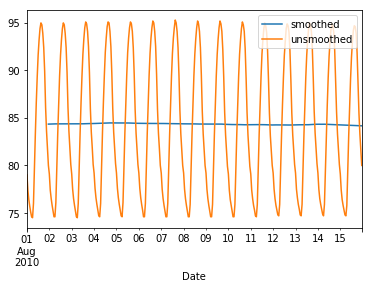

In [463]:
# Extract data from 2010-Aug-01 to 2010-Aug-15: unsmoothed
unsmoothed = weather['Temperature']['2010-Aug-01':'2010-Aug-15']

# Apply a rolling mean with a 24 hour window: smoothed
smoothed = unsmoothed.rolling(window = 24).mean()

# Create a new DataFrame with columns smoothed and unsmoothed: august
august = pd.DataFrame({'smoothed':smoothed, 'unsmoothed':unsmoothed})

# Plot both smoothed and unsmoothed data using august.plot().
august.plot()
plt.show()


### Resample and roll with it

In [466]:
# Extract the August 2010 data: august
august = weather['Temperature']['2010-Aug']

# Resample to daily data, aggregating by max: daily_highs
daily_highs = august.resample('D').max()

print(daily_highs.tail(10))
print('-----------------')

# Use a rolling 7-day window with method chaining to smooth the daily high temperatures in August
daily_highs_smoothed = daily_highs.rolling(window = 7).mean()

print(daily_highs_smoothed.tail(10))



Date
2010-08-22    94.6
2010-08-23    94.5
2010-08-24    94.3
2010-08-25    94.1
2010-08-26    94.0
2010-08-27    93.7
2010-08-28    93.5
2010-08-29    93.3
2010-08-30    93.3
2010-08-31    93.1
Freq: D, Name: Temperature, dtype: float64
-----------------
Date
2010-08-22    94.742857
2010-08-23    94.714286
2010-08-24    94.642857
2010-08-25    94.542857
2010-08-26    94.428571
2010-08-27    94.271429
2010-08-28    94.100000
2010-08-29    93.914286
2010-08-30    93.742857
2010-08-31    93.571429
Freq: D, Name: Temperature, dtype: float64


## Manipulating pandas time series

#### Reload the sales data with datetime but not as the index

In [468]:
file = 'https://assets.datacamp.com/production/course_1639/datasets/sales-feb-2015.csv'
sales = pd.read_csv(file, parse_dates = ['Date'])
print(sales.info())
sales.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 4 columns):
Date       19 non-null datetime64[ns]
Company    19 non-null object
Product    19 non-null object
Units      19 non-null int64
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 688.0+ bytes
None


Date          Company   Product  Units
0 2015-02-02 08:30:00            Hooli  Software      3
1 2015-02-02 21:00:00        Mediacore  Hardware      9
2 2015-02-03 14:00:00          Initech  Software     13
3 2015-02-04 15:30:00        Streeplex  Software     13
4 2015-02-04 22:00:00  Acme Coporation  Hardware     14

#### String methods

In [473]:
# chain a method onto the str method
sales['Company'].str.upper()

0               HOOLI
1           MEDIACORE
2             INITECH
3           STREEPLEX
4     ACME COPORATION
5     ACME COPORATION
6               HOOLI
7     ACME COPORATION
8           STREEPLEX
9           MEDIACORE
10            INITECH
11              HOOLI
12              HOOLI
13          MEDIACORE
14          MEDIACORE
15          MEDIACORE
16              HOOLI
17            INITECH
18          STREEPLEX
Name: Company, dtype: object

In [472]:
# Substring matching
sales['Product'].str.contains('ware')

0      True
1      True
2      True
3      True
4      True
5      True
6     False
7      True
8     False
9      True
10     True
11     True
12     True
13     True
14    False
15     True
16     True
17    False
18    False
Name: Product, dtype: bool

In [475]:
# Boolean reduction
# How many hardware and software sales were made?
sales['Product'].str.contains('ware').sum()

14

#### Datetime methods

In [476]:
# get the hour of the day
sales['Date'].dt.hour

0      8
1     21
2     14
3     15
4     22
5      2
6     22
7     23
8      9
9     13
10    20
11    23
12    12
13    11
14    16
15     5
16    20
17     0
18     9
Name: Date, dtype: int64

In [478]:
# set timezone
central = sales['Date'].dt.tz_localize('US/Central')
central

0    2015-02-02 08:30:00-06:00
1    2015-02-02 21:00:00-06:00
2    2015-02-03 14:00:00-06:00
3    2015-02-04 15:30:00-06:00
4    2015-02-04 22:00:00-06:00
5    2015-02-05 02:00:00-06:00
6    2015-02-05 22:00:00-06:00
7    2015-02-07 23:00:00-06:00
8    2015-02-09 09:00:00-06:00
9    2015-02-09 13:00:00-06:00
10   2015-02-11 20:00:00-06:00
11   2015-02-11 23:00:00-06:00
12   2015-02-16 12:00:00-06:00
13   2015-02-19 11:00:00-06:00
14   2015-02-19 16:00:00-06:00
15   2015-02-21 05:00:00-06:00
16   2015-02-21 20:30:00-06:00
17   2015-02-25 00:30:00-06:00
18   2015-02-26 09:00:00-06:00
Name: Date, dtype: datetime64[ns, US/Central]

In [479]:
# convert timezone
central.dt.tz_convert('US/Eastern')

0    2015-02-02 09:30:00-05:00
1    2015-02-02 22:00:00-05:00
2    2015-02-03 15:00:00-05:00
3    2015-02-04 16:30:00-05:00
4    2015-02-04 23:00:00-05:00
5    2015-02-05 03:00:00-05:00
6    2015-02-05 23:00:00-05:00
7    2015-02-08 00:00:00-05:00
8    2015-02-09 10:00:00-05:00
9    2015-02-09 14:00:00-05:00
10   2015-02-11 21:00:00-05:00
11   2015-02-12 00:00:00-05:00
12   2015-02-16 13:00:00-05:00
13   2015-02-19 12:00:00-05:00
14   2015-02-19 17:00:00-05:00
15   2015-02-21 06:00:00-05:00
16   2015-02-21 21:30:00-05:00
17   2015-02-25 01:30:00-05:00
18   2015-02-26 10:00:00-05:00
Name: Date, dtype: datetime64[ns, US/Eastern]

In [480]:
# we can chain these steps to do it all at once
sales['Date'].dt.tz_localize('US/Central').dt.tz_convert('US/Eastern')

0    2015-02-02 09:30:00-05:00
1    2015-02-02 22:00:00-05:00
2    2015-02-03 15:00:00-05:00
3    2015-02-04 16:30:00-05:00
4    2015-02-04 23:00:00-05:00
5    2015-02-05 03:00:00-05:00
6    2015-02-05 23:00:00-05:00
7    2015-02-08 00:00:00-05:00
8    2015-02-09 10:00:00-05:00
9    2015-02-09 14:00:00-05:00
10   2015-02-11 21:00:00-05:00
11   2015-02-12 00:00:00-05:00
12   2015-02-16 13:00:00-05:00
13   2015-02-19 12:00:00-05:00
14   2015-02-19 17:00:00-05:00
15   2015-02-21 06:00:00-05:00
16   2015-02-21 21:30:00-05:00
17   2015-02-25 01:30:00-05:00
18   2015-02-26 10:00:00-05:00
Name: Date, dtype: datetime64[ns, US/Eastern]

#### Interpolation

In [483]:
file = 'https://assets.datacamp.com/production/course_1639/datasets/world_population.csv'
population = pd.read_csv(file, parse_dates = True, index_col = 'Year')
population.head()

Total Population
Year                        
1960-01-01      3.034971e+09
1970-01-01      3.684823e+09
1980-01-01      4.436590e+09
1990-01-01      5.282716e+09
2000-01-01      6.115974e+09

In [485]:
population.resample('A').first().head(25)

Total Population
Year                        
1960-12-31      3.034971e+09
1961-12-31               NaN
1962-12-31               NaN
1963-12-31               NaN
1964-12-31               NaN
1965-12-31               NaN
1966-12-31               NaN
1967-12-31               NaN
1968-12-31               NaN
1969-12-31               NaN
1970-12-31      3.684823e+09
1971-12-31               NaN
1972-12-31               NaN
1973-12-31               NaN
1974-12-31               NaN
1975-12-31               NaN
1976-12-31               NaN
1977-12-31               NaN
1978-12-31               NaN
1979-12-31               NaN
1980-12-31      4.436590e+09
1981-12-31               NaN
1982-12-31               NaN
1983-12-31               NaN
1984-12-31               NaN

In [486]:
population.resample('A').first().interpolate('linear').head(25)

Total Population
Year                        
1960-12-31      3.034971e+09
1961-12-31      3.099956e+09
1962-12-31      3.164941e+09
1963-12-31      3.229926e+09
1964-12-31      3.294911e+09
1965-12-31      3.359897e+09
1966-12-31      3.424882e+09
1967-12-31      3.489867e+09
1968-12-31      3.554852e+09
1969-12-31      3.619837e+09
1970-12-31      3.684823e+09
1971-12-31      3.759999e+09
1972-12-31      3.835176e+09
1973-12-31      3.910353e+09
1974-12-31      3.985530e+09
1975-12-31      4.060707e+09
1976-12-31      4.135883e+09
1977-12-31      4.211060e+09
1978-12-31      4.286237e+09
1979-12-31      4.361414e+09
1980-12-31      4.436590e+09
1981-12-31      4.521203e+09
1982-12-31      4.605815e+09
1983-12-31      4.690428e+09
1984-12-31      4.775041e+09

### Method chaining and filtering

In [492]:
file = 'https://assets.datacamp.com/production/course_1639/datasets/austin_airport_departure_data_2015_july.csv'
flights = pd.read_csv(file, delimiter=',', header=10, parse_dates = True, index_col = 'Date (MM/DD/YYYY)')
flights.head()

Carrier Code  Flight Number Tail Number  \
Date (MM/DD/YYYY)                                             
2015-07-01                    WN          103.0      N8607M   
2015-07-01                    WN          144.0      N8609A   
2015-07-01                    WN          178.0      N646SW   
2015-07-01                    WN          232.0      N204WN   
2015-07-01                    WN          238.0      N233LV   

                  Destination Airport  Scheduled Departure Time  \
Date (MM/DD/YYYY)                                                 
2015-07-01                         MDW                    06:30   
2015-07-01                         SAN                    20:55   
2015-07-01                         ELP                    20:30   
2015-07-01                         ATL                    05:45   
2015-07-01                         DAL                    12:30   

                  Actual Departure Time  Scheduled Elapsed Time(Minutes)  \
Date (MM/DD/YYYY)                                                          
2015-07-01                        06:52                            165.0   
2015-07-01                        20:50                            170.0   
2015-07-01                        20:45                             90.0   
2015-07-01                        05:49                            135.0   
2015-07-01                        12:34                             55.0   

                   Actual Elapsed Time(Minutes)  Departure Delay(Minutes)  \
Date (MM/DD/YYYY)                                                           
2015-07-01                                147.0                      22.0   
2015-07-01                                158.0                      -5.0   
2015-07-01                                 80.0                      15.0   
2015-07-01                                137.0                       4.0   
2015-07-01                                 48.0                       4.0   

                  Wheels-off Time  Taxi-out Time(Minutes)  \
Date (MM/DD/YYYY)                                           
2015-07-01                  07:01                     9.0   
2015-07-01                  21:03                    13.0   
2015-07-01                  20:55                    10.0   
2015-07-01                  06:01                    12.0   
2015-07-01                  12:41                     7.0   

                   DelayCarrier(Minutes)  DelayWeather(Minutes)  \
Date (MM/DD/YYYY)                                                 
2015-07-01                           0.0                    0.0   
2015-07-01                           0.0                    0.0   
2015-07-01                           0.0                    0.0   
2015-07-01                           0.0                    0.0   
2015-07-01                           0.0                    0.0   

                   DelayNational Aviation System(Minutes)  \
Date (MM/DD/YYYY)                                           
2015-07-01                                            0.0   
2015-07-01                                            0.0   
2015-07-01                                            0.0   
2015-07-01                                            0.0   
2015-07-01                                            0.0   

                   DelaySecurity(Minutes)  \
Date (MM/DD/YYYY)                           
2015-07-01                            0.0   
2015-07-01                            0.0   
2015-07-01                            0.0   
2015-07-01                            0.0   
2015-07-01                            0.0   

                   DelayLate Aircraft Arrival(Minutes)  Unnamed: 17  
Date (MM/DD/YYYY)                                                    
2015-07-01                                         0.0          NaN  
2015-07-01                                         0.0          NaN  
2015-07-01                                         0.0          NaN  
2015-07-01                                 

In [496]:
# Strip extra whitespace from the column names: df.columns
flights.columns = flights.columns.str.strip()

# Extract data for which the destination airport is Dallas: dallas
dallas = flights['Destination Airport'].str.contains('DAL')
dallas.head()

Date (MM/DD/YYYY)
2015-07-01    False
2015-07-01    False
2015-07-01    False
2015-07-01    False
2015-07-01     True
Name: Destination Airport, dtype: object

In [497]:
# Compute the total number of Dallas departures each day: daily_departures
daily_departures = dallas.resample('D').sum()
print(daily_departures.head())

Date (MM/DD/YYYY)
2015-07-01    10
2015-07-02    10
2015-07-03    11
2015-07-04     3
2015-07-05     9
dtype: int64


In [498]:
# Generate the summary statistics for daily Dallas departures: stats
stats = daily_departures.describe()
stats

count    31.000000
mean      9.322581
std       1.989759
min       3.000000
25%       9.500000
50%      10.000000
75%      10.000000
max      11.000000
dtype: float64

### Missing values and interpolation

In [500]:
ts1

2016-07-01     0
2016-07-02     1
2016-07-03     2
2016-07-04     3
2016-07-05     4
2016-07-06     5
2016-07-07     6
2016-07-08     7
2016-07-09     8
2016-07-10     9
2016-07-11    10
2016-07-12    11
2016-07-13    12
2016-07-14    13
2016-07-15    14
2016-07-16    15
2016-07-17    16
Freq: D, dtype: int64

In [501]:
ts2

2016-07-01     0
2016-07-04     1
2016-07-05     2
2016-07-06     3
2016-07-07     4
2016-07-08     5
2016-07-11     6
2016-07-12     7
2016-07-13     8
2016-07-14     9
2016-07-15    10
dtype: int64

In [505]:
# Reset the index of ts2 to ts1, and then use linear interpolation to fill in the NaNs: ts2_interp
ts2_interp = ts2.reindex(ts1.index).interpolate(how = 'linear')
ts2_interp.head(12)

2016-07-01    0.000000
2016-07-02    0.333333
2016-07-03    0.666667
2016-07-04    1.000000
2016-07-05    2.000000
2016-07-06    3.000000
2016-07-07    4.000000
2016-07-08    5.000000
2016-07-09    5.333333
2016-07-10    5.666667
2016-07-11    6.000000
2016-07-12    7.000000
Freq: D, dtype: float64

In [508]:
# Compute the absolute difference of ts1 and ts2_interp: differences 
differences = np.abs(ts1 - ts2_interp)
differences.head(12)

2016-07-01    0.000000
2016-07-02    0.666667
2016-07-03    1.333333
2016-07-04    2.000000
2016-07-05    2.000000
2016-07-06    2.000000
2016-07-07    2.000000
2016-07-08    2.000000
2016-07-09    2.666667
2016-07-10    3.333333
2016-07-11    4.000000
2016-07-12    4.000000
Freq: D, dtype: float64

In [509]:
# Generate and print summary statistics of the differences
print(differences.describe())

count    17.000000
mean      2.882353
std       1.585267
min       0.000000
25%       2.000000
50%       2.666667
75%       4.000000
max       6.000000
dtype: float64


### Time zones and conversion

In [512]:
# Buid a Boolean mask to filter out all the 'LAX' departure flights: mask
mask = flights['Destination Airport'] == 'LAX'

# Use the mask to subset the data: la
la = flights[mask]

la.head()

Carrier Code  Flight Number Tail Number Destination Airport  \
Date (MM/DD/YYYY)                                                               
2015-07-01                  WN         1249.0      N430WN                 LAX   
2015-07-01                  WN         4924.0      N757LV                 LAX   
2015-07-02                  WN         1249.0      N570WN                 LAX   
2015-07-02                  WN         4924.0      N379SW                 LAX   
2015-07-03                  WN         1249.0      N487WN                 LAX   

                  Scheduled Departure Time Actual Departure Time  \
Date (MM/DD/YYYY)                                                  
2015-07-01                           05:30                 05:29   
2015-07-01                           16:00                 16:15   
2015-07-02                           05:30                 05:38   
2015-07-02                           16:00                 16:07   
2015-07-03                           05:10                 05:16   

                   Scheduled Elapsed Time(Minutes)  \
Date (MM/DD/YYYY)                                    
2015-07-01                                   185.0   
2015-07-01                                   185.0   
2015-07-02                                   185.0   
2015-07-02                                   185.0   
2015-07-03                                   185.0   

                   Actual Elapsed Time(Minutes)  Departure Delay(Minutes)  \
Date (MM/DD/YYYY)                                                           
2015-07-01                                173.0                      -1.0   
2015-07-01                                169.0                      15.0   
2015-07-02                                171.0                       8.0   
2015-07-02                                173.0                       7.0   
2015-07-03                                174.0                       6.0   

                  Wheels-off Time  Taxi-out Time(Minutes)  \
Date (MM/DD/YYYY)                                           
2015-07-01                  05:43                    14.0   
2015-07-01                  16:27                    12.0   
2015-07-02                  05:47                     9.0   
2015-07-02                  16:23                    16.0   
2015-07-03                  05:30                    14.0   

                   DelayCarrier(Minutes)  DelayWeather(Minutes)  \
Date (MM/DD/YYYY)                                                 
2015-07-01                           0.0                    0.0   
2015-07-01                           0.0                    0.0   
2015-07-02                           0.0                    0.0   
2015-07-02                           0.0                    0.0   
2015-07-03                           0.0                    0.0   

                   DelayNational Aviation System(Minutes)  \
Date (MM/DD/YYYY)                                           
2015-07-01                                            0.0   
2015-07-01                                            0.0   
2015-07-02                                            0.0   
2015-07-02                                            0.0   
2015-07-03                                            0.0   

                   DelaySecurity(Minutes)  \
Date (MM/DD/YYYY)                           
2015-07-01                            0.0   
2015-07-01                            0.0   
2015-07-02                            0.0   
2015-07-02                            0.0   
2015-07-03                            0.0   

                   DelayLate Aircraft Arrival(Minutes)  Unnamed: 17  
Date (MM/DD/YYYY)                                                    
2015-07-01                                         0.0          NaN  
2015-07-01                                         0.0          NaN  
2015-07-02                                         0.0          NaN  
2015-07-02                                         0.0        

In [528]:
# Combine two columns of data to create a datetime series: times_tz_none 
times_tz_none = pd.to_datetime(la['Wheels-off Time'])
times_tz_none.head()

Date (MM/DD/YYYY)
2015-07-01   2017-10-30 05:43:00
2015-07-01   2017-10-30 16:27:00
2015-07-02   2017-10-30 05:47:00
2015-07-02   2017-10-30 16:23:00
2015-07-03   2017-10-30 05:30:00
Name: Wheels-off Time, dtype: datetime64[ns]

In [529]:
# Localize the time to US/Central: times_tz_central
times_tz_central = times_tz_none.dt.tz_localize('US/Central')

# Convert the datetimes from US/Central to US/Pacific
times_tz_pacific = times_tz_central.dt.tz_convert('US/Pacific')
times_tz_pacific.head()

Date (MM/DD/YYYY)
2015-07-01   2017-10-30 03:43:00-07:00
2015-07-01   2017-10-30 14:27:00-07:00
2015-07-02   2017-10-30 03:47:00-07:00
2015-07-02   2017-10-30 14:23:00-07:00
2015-07-03   2017-10-30 03:30:00-07:00
Name: Wheels-off Time, dtype: datetime64[ns, US/Pacific]

## Visualizing pandas time series

#### Load data

In [531]:
file = 'https://assets.datacamp.com/production/course_1639/datasets/sp500.csv'

sp500 = pd.read_csv(file, parse_dates = True, index_col = 'Date')

sp500.head()

Open         High          Low        Close      Volume  \
Date                                                                         
2010-01-04  1116.560059  1133.869995  1116.560059  1132.989990  3991400000   
2010-01-05  1132.660034  1136.630005  1129.660034  1136.520020  2491020000   
2010-01-06  1135.709961  1139.189941  1133.949951  1137.140015  4972660000   
2010-01-07  1136.270020  1142.459961  1131.319946  1141.689941  5270680000   
2010-01-08  1140.520020  1145.390015  1136.219971  1144.979980  4389590000   

              Adj Close  
Date                     
2010-01-04  1132.989990  
2010-01-05  1136.520020  
2010-01-06  1137.140015  
2010-01-07  1141.689941  
2010-01-08  1144.979980

#### Pandas plot
- pandas automatically formats the dates on the x-axis 

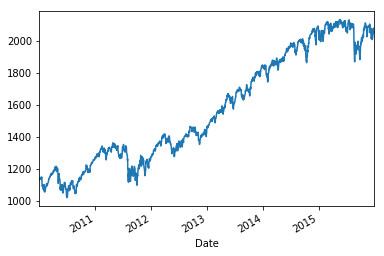

In [533]:
# Create base plot
sp500['Close'].plot()
plt.show()

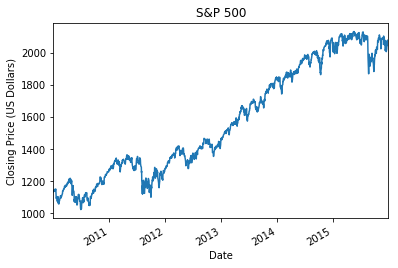

In [534]:
# Add lables and title
sp500['Close'].plot(title = 'S&P 500')

plt.ylabel('Closing Price (US Dollars)')

plt.show()

#### Show just one week
- The date format will automtically update to show just the date
- The year and month are shown in the bottom left below the first date tick

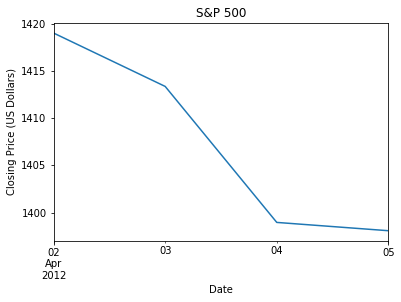

In [535]:
sp500.loc['2012-4-1':'2012-4-7', 'Close'].plot(title = 'S&P 500')

plt.ylabel('Closing Price (US Dollars)')

plt.show()

#### Plot styles
- We can use matlab like style strings
- Style format string
 - color (k black)
 - marker (. dot)
 - line type (- solid)
- Other common styles
 - color - `b` blue, `g` green, `r` red, `c` cyan
 - marker - `o` circle, `*` star, `s` square, `+` plus 
 - line type - `:` dotted, `-` dashed
 

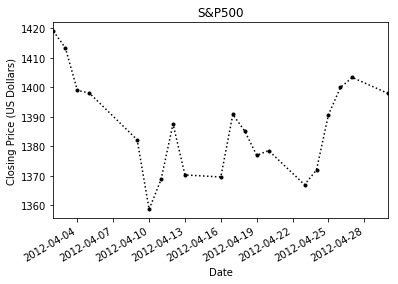

In [540]:
sp500.loc['2012-4','Close'].plot(
    style = 'k.:',
    title = 'S&P500')

plt.ylabel('Closing Price (US Dollars)')

plt.show()

#### Area plot

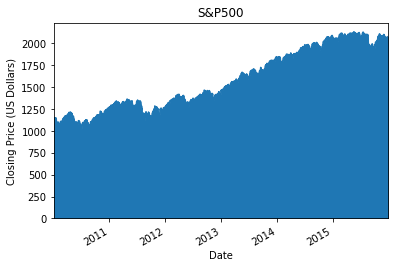

In [542]:
sp500['Close'].plot(
    kind = 'area',
    title = 'S&P500')

plt.ylabel('Closing Price (US Dollars)')

plt.show()

#### Subplots
- The volume is so large compared to the other valus that it can't go on the same plot or you will not be able to see any other values
- but subplot allows us to see it in line with other vales on its own plot and y-axis

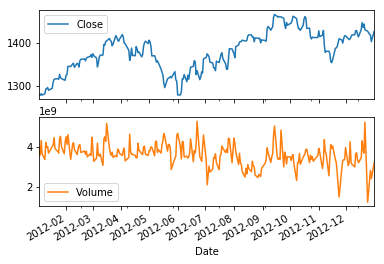

In [543]:
sp500.loc['2012', ['Close','Volume']].plot(subplots = True)
plt.show()

### Plotting time series, datetime indexing

In [544]:
temps = pd.read_csv('https://assets.datacamp.com/production/course_1639/datasets/weather_data_austin_2010.csv')
temps.head()

Temperature  DewPoint  Pressure            Date
0         46.2      37.5       1.0  20100101 00:00
1         44.6      37.1       1.0  20100101 01:00
2         44.1      36.9       1.0  20100101 02:00
3         43.8      36.9       1.0  20100101 03:00
4         43.5      36.8       1.0  20100101 04:00

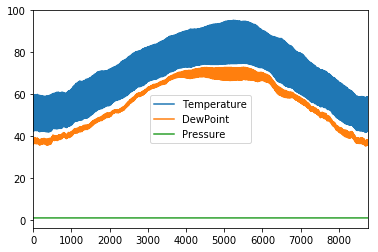

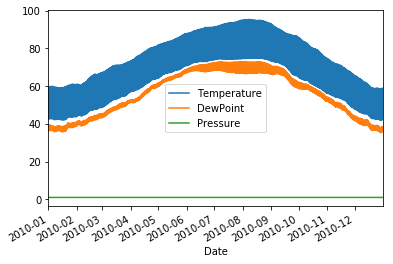

In [545]:
# Plot the raw data before setting the datetime index
temps.plot()
plt.show()

# Convert the 'Date' column into a collection of datetime objects: df.Date
temps.Date = pd.to_datetime(temps.Date)

# Set the index to be the converted 'Date' column
temps.set_index('Date', inplace = True)

# Re-plot the DataFrame to see that the axis is now datetime aware!
temps.plot()
plt.show()


### Plotting date ranges, partial indexing

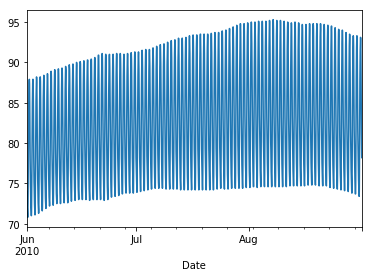

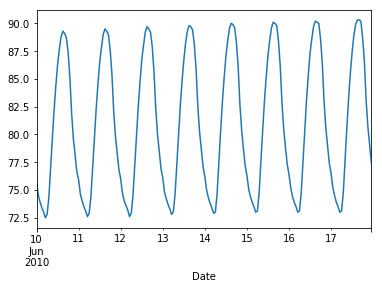

In [546]:
# Plot the summer data
temps.Temperature['2010-Jun':'2010-Aug'].plot()
plt.show()
plt.clf()

# Plot the one week data
temps.Temperature['2010-06-10':'2010-06-17'].plot()
plt.show()
plt.clf()


# Case Study - Sunlight in Austin

## Reading and cleaning the data

### Reading in a data file

In [574]:
file = 'https://assets.datacamp.com/production/course_1639/datasets/NOAA_QCLCD_2011_hourly_13904.txt'

# Read in the data file: df
df = pd.read_csv(file)

# Print the output of df.head()
print(df.head())

   13904  20110101  0053  12  OVC045     10.00  .1  .2  .3 ...   .18  .19  \
0  13904  20110101   153  12  OVC049     10.00             ...              
1  13904  20110101   253  12  OVC060     10.00             ...   030        
2  13904  20110101   353  12  OVC065     10.00             ...              
3  13904  20110101   453  12  BKN070     10.00             ...              
4  13904  20110101   553  12  BKN065     10.00             ...   015        

   29.95  .20  AA  .21  .22  .23 29.95.1  .24  
0  30.01       AA                  30.02       
1  30.01       AA                  30.02       
2  30.03       AA                  30.04       
3  30.04       AA                  30.04       
4  30.06       AA                  30.06       

[5 rows x 44 columns]


In [575]:
# Read in the data file with header=None: df_headers
df_headers = pd.read_csv(file, header=None)

# Print the output of df_headers.head()
print(df_headers.head())

      0         1    2   3       4  5      6  7  8  9  ...   34 35     36 37  \
0  13904  20110101   53  12  OVC045     10.00          ...          29.95      
1  13904  20110101  153  12  OVC049     10.00          ...          30.01      
2  13904  20110101  253  12  OVC060     10.00          ...  030     30.01      
3  13904  20110101  353  12  OVC065     10.00          ...          30.03      
4  13904  20110101  453  12  BKN070     10.00          ...          30.04      

   38 39 40 41     42 43  
0  AA           29.95     
1  AA           30.02     
2  AA           30.02     
3  AA           30.04     
4  AA           30.04     

[5 rows x 44 columns]


### Re-assigning column names

In [576]:
column_labels = 'Wban,date,Time,StationType,sky_condition,sky_conditionFlag,\
visibility,visibilityFlag,wx_and_obst_to_vision,wx_and_obst_to_visionFlag,\
dry_bulb_faren,dry_bulb_farenFlag,dry_bulb_cel,dry_bulb_celFlag,wet_bulb_faren,\
wet_bulb_farenFlag,wet_bulb_cel,wet_bulb_celFlag,dew_point_faren,dew_point_farenFlag,\
dew_point_cel,dew_point_celFlag,relative_humidity,relative_humidityFlag,wind_speed,\
wind_speedFlag,wind_direction,wind_directionFlag,value_for_wind_character,\
value_for_wind_characterFlag,station_pressure,station_pressureFlag,pressure_tendency,\
pressure_tendencyFlag,presschange,presschangeFlag,sea_level_pressure,sea_level_pressureFlag,\
record_type,hourly_precip,hourly_precipFlag,altimeter,altimeterFlag,junk'

In [577]:
list_to_drop = ['sky_conditionFlag',
 'visibilityFlag',
 'wx_and_obst_to_vision',
 'wx_and_obst_to_visionFlag',
 'dry_bulb_farenFlag',
 'dry_bulb_celFlag',
 'wet_bulb_farenFlag',
 'wet_bulb_celFlag',
 'dew_point_farenFlag',
 'dew_point_celFlag',
 'relative_humidityFlag',
 'wind_speedFlag',
 'wind_directionFlag',
 'value_for_wind_character',
 'value_for_wind_characterFlag',
 'station_pressureFlag',
 'pressure_tendencyFlag',
 'pressure_tendency',
 'presschange',
 'presschangeFlag',
 'sea_level_pressureFlag',
 'hourly_precip',
 'hourly_precipFlag',
 'altimeter',
 'record_type',
 'altimeterFlag',
 'junk']

In [578]:
# Split on the comma to create a list: column_labels_list
column_labels_list = column_labels.split(',')

# Assign the new column labels to the DataFrame: df.columns
df.columns = column_labels_list

# Remove the appropriate columns: df_dropped
df_dropped = df.drop(list_to_drop, axis = 'columns')

# Print the output of df_dropped.head()
print(df_dropped.head())

    Wban      date  Time  StationType sky_condition visibility dry_bulb_faren  \
0  13904  20110101   153           12        OVC049      10.00             51   
1  13904  20110101   253           12        OVC060      10.00             51   
2  13904  20110101   353           12        OVC065      10.00             50   
3  13904  20110101   453           12        BKN070      10.00             50   
4  13904  20110101   553           12        BKN065      10.00             49   

  dry_bulb_cel wet_bulb_faren wet_bulb_cel dew_point_faren dew_point_cel  \
0         10.6             37          3.0              14         -10.0   
1         10.6             37          2.9              13         -10.6   
2         10.0             38          3.1              17          -8.3   
3         10.0             37          2.8              15          -9.4   
4          9.4             37          2.8              17          -8.3   

  relative_humidity wind_speed wind_direction station_pr

### Cleaning and tidying datetime data

In [579]:
# Convert the date column to string: df_dropped['date']
df_dropped['date'] = df_dropped['date'].astype(str)

# Pad leading zeros to the Time column: df_dropped['Time']
df_dropped['Time'] = df_dropped['Time'].apply(lambda x:'{:0>4}'.format(x))

# Concatenate the new date and Time columns: date_string
date_string = df_dropped['date'] + df_dropped['Time']

# Convert the date_string Series to datetime: date_times
date_times = pd.to_datetime(date_string, format='%Y%m%d%H%M')

# Set the index to be the new date_times container: df_clean
df_clean = df_dropped.set_index(date_times)

# Print the output of df_clean.head()
print(df_clean.head())

                      Wban      date  Time  StationType sky_condition  \
2011-01-01 01:53:00  13904  20110101  0153           12        OVC049   
2011-01-01 02:53:00  13904  20110101  0253           12        OVC060   
2011-01-01 03:53:00  13904  20110101  0353           12        OVC065   
2011-01-01 04:53:00  13904  20110101  0453           12        BKN070   
2011-01-01 05:53:00  13904  20110101  0553           12        BKN065   

                    visibility dry_bulb_faren dry_bulb_cel wet_bulb_faren  \
2011-01-01 01:53:00      10.00             51         10.6             37   
2011-01-01 02:53:00      10.00             51         10.6             37   
2011-01-01 03:53:00      10.00             50         10.0             38   
2011-01-01 04:53:00      10.00             50         10.0             37   
2011-01-01 05:53:00      10.00             49          9.4             37   

                    wet_bulb_cel dew_point_faren dew_point_cel  \
2011-01-01 01:53:00          3.0

### Cleaning the numeric columns

In [604]:
# Print the dry_bulb_faren temperature between 8 AM and 9 AM on June 20, 2011
print(df_clean.loc['2011-06-20 08:00:00':'2011-06-20 09:00:00', 'dry_bulb_faren'])
print('-------------------------')

# Convert the dry_bulb_faren column to numeric values: df_clean['dry_bulb_faren']
df_clean['dry_bulb_faren'] = pd.to_numeric(df_clean['dry_bulb_faren'], errors = 'coerce')

# Print the transformed dry_bulb_faren temperature between 8 AM and 9 AM on June 20, 2011
print(df_clean.loc['2011-06-20 08:00:00':'2011-06-20 09:00:00', 'dry_bulb_faren'])
print('-------------------------')

# Convert the wind_speed and dew_point_faren columns to numeric values
df_clean['wind_speed'] = pd.to_numeric(df_clean['wind_speed'], errors = 'coerce')
df_clean['dew_point_faren'] = pd.to_numeric(df_clean['dew_point_faren'], errors = 'coerce')

# I am also converting visibility becasue we use it later
df_clean['visibility'] = pd.to_numeric(df_clean['visibility'], errors = 'coerce')

2011-06-20 08:27:00     NaN
2011-06-20 08:28:00     NaN
2011-06-20 08:29:00     NaN
2011-06-20 08:30:00     NaN
2011-06-20 08:31:00     NaN
2011-06-20 08:32:00     NaN
2011-06-20 08:33:00     NaN
2011-06-20 08:34:00     NaN
2011-06-20 08:35:00     NaN
2011-06-20 08:53:00    83.0
Name: dry_bulb_faren, dtype: float64
-------------------------
2011-06-20 08:27:00     NaN
2011-06-20 08:28:00     NaN
2011-06-20 08:29:00     NaN
2011-06-20 08:30:00     NaN
2011-06-20 08:31:00     NaN
2011-06-20 08:32:00     NaN
2011-06-20 08:33:00     NaN
2011-06-20 08:34:00     NaN
2011-06-20 08:35:00     NaN
2011-06-20 08:53:00    83.0
Name: dry_bulb_faren, dtype: float64
-------------------------


## Statistical exploratory data analysis

### Signal min, max, median

In [605]:
# Print the median of the dry_bulb_faren column
print(df_clean['dry_bulb_faren'].median())

# Print the median of the dry_bulb_faren column for the time range '2011-Apr':'2011-Jun'
print(df_clean.loc['2011-Apr':'2011-Jun', 'dry_bulb_faren'].median())

# Print the median of the dry_bulb_faren column for the month of January
print(df_clean.loc['2011-Jan', 'dry_bulb_faren'].median())

72.0
78.0
48.0


### Signal variance
- On average, how much hotter was every day in 2011 than expected from the 30-year average?

In [582]:
df_clean.head()

Wban      date  Time  StationType sky_condition  \
2011-01-01 01:53:00  13904  20110101  0153           12        OVC049   
2011-01-01 02:53:00  13904  20110101  0253           12        OVC060   
2011-01-01 03:53:00  13904  20110101  0353           12        OVC065   
2011-01-01 04:53:00  13904  20110101  0453           12        BKN070   
2011-01-01 05:53:00  13904  20110101  0553           12        BKN065   

                    visibility  dry_bulb_faren dry_bulb_cel wet_bulb_faren  \
2011-01-01 01:53:00      10.00            51.0         10.6             37   
2011-01-01 02:53:00      10.00            51.0         10.6             37   
2011-01-01 03:53:00      10.00            50.0         10.0             38   
2011-01-01 04:53:00      10.00            50.0         10.0             37   
2011-01-01 05:53:00      10.00            49.0          9.4             37   

                    wet_bulb_cel  dew_point_faren dew_point_cel  \
2011-01-01 01:53:00          3.0             14.0         -10.0   
2011-01-01 02:53:00          2.9             13.0         -10.6   
2011-01-01 03:53:00          3.1             17.0          -8.3   
2011-01-01 04:53:00          2.8             15.0          -9.4   
2011-01-01 05:53:00          2.8             17.0          -8.3   

                    relative_humidity  wind_speed wind_direction  \
2011-01-01 01:53:00                23        10.0            340   
2011-01-01 02:53:00                22        15.0            010   
2011-01-01 03:53:00                27         7.0            350   
2011-01-01 04:53:00                25        11.0            020   
2011-01-01 05:53:00                28         6.0            010   

                    station_pressure sea_level_pressure  
2011-01-01 01:53:00            29.49              30.01  
2011-01-01 02:53:00            29.49              30.01  
2011-01-01 03:53:00            29.51              30.03  
2011-01-01 04:53:00            29.51              30.04  
2011-01-01 05:53:00            29.53              30.06

In [585]:
df_climate = weather
df_climate.head()

Temperature  DewPoint  Pressure
Date                                                
2010-01-01 00:00:00         46.2      37.5       1.0
2010-01-01 01:00:00         44.6      37.1       1.0
2010-01-01 02:00:00         44.1      36.9       1.0
2010-01-01 03:00:00         43.8      36.9       1.0
2010-01-01 04:00:00         43.5      36.8       1.0

In [586]:
# Downsample df_clean by day and aggregate by mean: daily_mean_2011
daily_mean_2011 = df_clean.resample('D').mean()
daily_mean_2011.head()

Wban  StationType  dry_bulb_faren  dew_point_faren  wind_speed
2011-01-01  13904           12       50.130435        20.739130   10.913043
2011-01-02  13904           12       39.416667        19.708333    4.166667
2011-01-03  13904           12       46.846154        35.500000    2.653846
2011-01-04  13904           12       53.367347        50.408163    2.510204
2011-01-05  13904           12       57.965517        40.068966    4.689655

In [587]:
# Extract the dry_bulb_faren column from daily_mean_2011 using .values: daily_temp_2011
daily_temp_2011 = daily_mean_2011['dry_bulb_faren'].values

daily_temp_2011[:6]

array([ 50.13043478,  39.41666667,  46.84615385,  53.36734694,
        57.96551724,  46.95833333])

In [588]:
# Downsample df_climate by day and aggregate by mean: daily_climate
daily_climate = df_climate.resample('D').mean()
daily_climate.head()

Temperature   DewPoint  Pressure
Date                                        
2010-01-01    49.337500  37.716667       1.0
2010-01-02    49.795833  38.370833       1.0
2010-01-03    49.900000  38.279167       1.0
2010-01-04    49.729167  38.008333       1.0
2010-01-05    49.841667  38.087500       1.0

In [589]:
# Extract the Temperature column from daily_climate using .reset_index(): daily_temp_climate
daily_temp_climate = daily_climate.reset_index()['Temperature']
daily_temp_climate[:6]

0    49.337500
1    49.795833
2    49.900000
3    49.729167
4    49.841667
5    49.679167
Name: Temperature, dtype: float64

In [590]:
# Compute the difference between the two arrays and print the mean difference
difference = daily_temp_2011 - daily_temp_climate
print(difference.mean())

1.33008392157


### Sunny or cloudy
- On average, how much hotter is it when the sun is shining?

In [591]:
# Select days that are sunny: sunny
sunny = df_clean.loc[df_clean['sky_condition'] == 'CLR']
sunny.head()

Wban      date  Time  StationType sky_condition  \
2011-01-01 13:53:00  13904  20110101  1353           12           CLR   
2011-01-01 14:53:00  13904  20110101  1453           12           CLR   
2011-01-01 15:53:00  13904  20110101  1553           12           CLR   
2011-01-01 16:53:00  13904  20110101  1653           12           CLR   
2011-01-01 17:53:00  13904  20110101  1753           12           CLR   

                    visibility  dry_bulb_faren dry_bulb_cel wet_bulb_faren  \
2011-01-01 13:53:00      10.00            59.0         15.0             45   
2011-01-01 14:53:00      10.00            59.0         15.0             45   
2011-01-01 15:53:00      10.00            57.0         13.9             44   
2011-01-01 16:53:00      10.00            55.0         12.8             43   
2011-01-01 17:53:00      10.00            50.0         10.0             40   

                    wet_bulb_cel  dew_point_faren dew_point_cel  \
2011-01-01 13:53:00          7.0             26.0          -3.3   
2011-01-01 14:53:00          7.2             27.0          -2.8   
2011-01-01 15:53:00          6.6             27.0          -2.8   
2011-01-01 16:53:00          6.1             27.0          -2.8   
2011-01-01 17:53:00          4.5             26.0          -3.3   

                    relative_humidity  wind_speed wind_direction  \
2011-01-01 13:53:00                28        14.0            010   
2011-01-01 14:53:00                29        16.0            360   
2011-01-01 15:53:00                32        11.0            350   
2011-01-01 16:53:00                34        13.0            040   
2011-01-01 17:53:00                39        10.0            040   

                    station_pressure sea_level_pressure  
2011-01-01 13:53:00            29.63              30.16  
2011-01-01 14:53:00            29.63              30.16  
2011-01-01 15:53:00            29.63              30.17  
2011-01-01 16:53:00            29.65              30.18  
2011-01-01 17:53:00            29.66              30.21

In [592]:
# Select days that are overcast: overcast
overcast = df_clean.loc[df_clean['sky_condition'].str.contains('OVC')]
overcast.head()

Wban      date  Time  StationType sky_condition  \
2011-01-01 01:53:00  13904  20110101  0153           12        OVC049   
2011-01-01 02:53:00  13904  20110101  0253           12        OVC060   
2011-01-01 03:53:00  13904  20110101  0353           12        OVC065   
2011-01-03 07:53:00  13904  20110103  0753           12        OVC055   
2011-01-03 08:53:00  13904  20110103  0853           12        OVC055   

                    visibility  dry_bulb_faren dry_bulb_cel wet_bulb_faren  \
2011-01-01 01:53:00      10.00            51.0         10.6             37   
2011-01-01 02:53:00      10.00            51.0         10.6             37   
2011-01-01 03:53:00      10.00            50.0         10.0             38   
2011-01-03 07:53:00      10.00            37.0          2.8             35   
2011-01-03 08:53:00      10.00            41.0          5.0             38   

                    wet_bulb_cel  dew_point_faren dew_point_cel  \
2011-01-01 01:53:00          3.0             14.0         -10.0   
2011-01-01 02:53:00          2.9             13.0         -10.6   
2011-01-01 03:53:00          3.1             17.0          -8.3   
2011-01-03 07:53:00          1.4             31.0          -0.6   
2011-01-03 08:53:00          3.1             33.0           0.6   

                    relative_humidity  wind_speed wind_direction  \
2011-01-01 01:53:00                23        10.0            340   
2011-01-01 02:53:00                22        15.0            010   
2011-01-01 03:53:00                27         7.0            350   
2011-01-03 07:53:00                79         0.0            000   
2011-01-03 08:53:00                73         3.0            080   

                    station_pressure sea_level_pressure  
2011-01-01 01:53:00            29.49              30.01  
2011-01-01 02:53:00            29.49              30.01  
2011-01-01 03:53:00            29.51              30.03  
2011-01-03 07:53:00            29.68              30.24  
2011-01-03 08:53:00            29.69              30.24

In [593]:
# Resample sunny and overcast, aggregating by maximum daily temperature
sunny_daily_max = sunny.resample('D').max()
sunny_daily_max.head()

Wban      date  Time  StationType sky_condition visibility  \
2011-01-01  13904.0  20110101  2353         12.0           CLR      10.00   
2011-01-02  13904.0  20110102  2253         12.0           CLR      10.00   
2011-01-03  13904.0  20110103  0453         12.0           CLR      10.00   
2011-01-04      NaN       NaN   NaN          NaN           NaN        NaN   
2011-01-05  13904.0  20110105  2353         12.0           CLR      10.00   

            dry_bulb_faren dry_bulb_cel wet_bulb_faren wet_bulb_cel  \
2011-01-01            59.0          8.3             45          7.2   
2011-01-02            35.0          1.7             32          0.1   
2011-01-03            32.0          0.0             29         -1.9   
2011-01-04             NaN          NaN            NaN          NaN   
2011-01-05            35.0          1.7             33          0.3   

            dew_point_faren dew_point_cel relative_humidity  wind_speed  \
2011-01-01             28.0          -6.1                53        16.0   
2011-01-02             28.0          -7.2                76         8.0   
2011-01-03             26.0          -4.4                85         0.0   
2011-01-04              NaN           NaN               NaN         NaN   
2011-01-05             29.0          -1.7                79         0.0   

           wind_direction station_pressure sea_level_pressure  
2011-01-01            360            29.78              30.33  
2011-01-02            360            29.82              30.38  
2011-01-03            000            29.71              30.27  
2011-01-04            NaN              NaN                NaN  
2011-01-05            000            29.54              30.08

In [594]:
overcast_daily_max = overcast.resample('D').max()
overcast_daily_max.head()

Wban      date  Time  StationType  sky_condition visibility  \
2011-01-01  13904.0  20110101  0353         12.0         OVC065      10.00   
2011-01-02      NaN       NaN   NaN          NaN            NaN        NaN   
2011-01-03  13904.0  20110103  2353         12.0  SCT042 OVC055      10.00   
2011-01-04  13904.0  20110104  2353         12.0  SCT010 OVC016      10.00   
2011-01-05  13904.0  20110105  0653         12.0  SCT006 OVC011      10.00   

            dry_bulb_faren dry_bulb_cel wet_bulb_faren wet_bulb_cel  \
2011-01-01            51.0         10.6             38          3.1   
2011-01-02             NaN          NaN            NaN          NaN   
2011-01-03            58.0          9.4             49          9.7   
2011-01-04            57.0          8.9             56          9.4   
2011-01-05            57.0         14.0             56         13.5   

            dew_point_faren dew_point_cel relative_humidity  wind_speed  \
2011-01-01             17.0          -8.3                27        15.0   
2011-01-02              NaN           NaN               NaN         NaN   
2011-01-03             45.0           7.0                79        10.0   
2011-01-04             56.0           8.9               100         8.0   
2011-01-05             56.0          13.3                96         3.0   

           wind_direction station_pressure sea_level_pressure  
2011-01-01            350            29.51              30.03  
2011-01-02            NaN              NaN                NaN  
2011-01-03            200            29.70                  M  
2011-01-04            VR             29.59                  M  
2011-01-05            250            29.48                  M

In [595]:
# Print the difference between the mean of sunny_daily_max and overcast_daily_max
print(sunny_daily_max.mean() - overcast_daily_max.mean())

Wban               0.000000
StationType        0.000000
dry_bulb_faren     6.504304
dew_point_faren   -4.339286
wind_speed        -3.246062
dtype: float64


## Visual exploratory data analysis

### Weekly average temperature and visibility

In [609]:
# Select the visibility and dry_bulb_faren columns and resample them: weekly_mean
weekly_mean = df_clean.loc[:,['visibility','dry_bulb_faren']].resample('W').mean()

print(weekly_mean.head())

            visibility  dry_bulb_faren
2011-01-02   10.000000       44.659574
2011-01-09    8.275785       50.246637
2011-01-16    6.451651       41.103774
2011-01-23    8.370853       47.194313
2011-01-30    9.966851       53.486188


In [610]:
# Print the output of weekly_mean.corr()
print(weekly_mean.corr())

                visibility  dry_bulb_faren
visibility         1.00000         0.49004
dry_bulb_faren     0.49004         1.00000


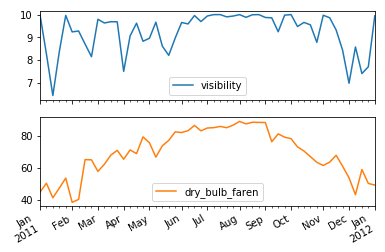

In [611]:
# Plot weekly_mean with subplots=True
weekly_mean.plot(subplots = True)
plt.show()

### Daily hours of clear sky
- We will use a box plot to visualize the fraction of days that are sunny.

In [613]:
# Create a Boolean Series for sunny days: sunny
sunny = df_clean['sky_condition'] == 'CLR'

# Resample the Boolean Series by day and compute the sum: sunny_hours
sunny_hours = sunny.resample('D').sum()

sunny_hours.head()

2011-01-01    11.0
2011-01-02     7.0
2011-01-03     3.0
2011-01-04     0.0
2011-01-05     1.0
Freq: D, Name: sky_condition, dtype: float64

In [614]:
# Resample the Boolean Series by day and compute the count: total_hours
total_hours = sunny.resample('D').count()

total_hours.head()

2011-01-01    23
2011-01-02    24
2011-01-03    26
2011-01-04    49
2011-01-05    29
Freq: D, Name: sky_condition, dtype: int64

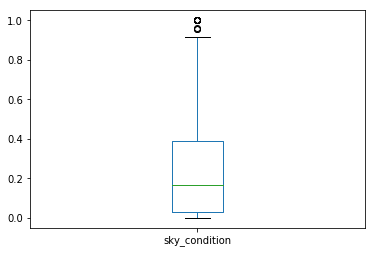

In [615]:
# Divide sunny_hours by total_hours: sunny_fraction
sunny_fraction = sunny_hours / total_hours

# Make a box plot of sunny_fraction
sunny_fraction.plot(kind='box')
plt.show()

### Heat or humidity

In [616]:
# Resample dew_point_faren and dry_bulb_faren by Month, aggregating the maximum values: monthly_max
monthly_max = df_clean.loc[:,['dew_point_faren','dry_bulb_faren']].resample('M').max()

monthly_max.head()

dew_point_faren  dry_bulb_faren
2011-01-31             63.0            80.0
2011-02-28             70.0            85.0
2011-03-31             68.0            87.0
2011-04-30             73.0            93.0
2011-05-31             76.0           100.0

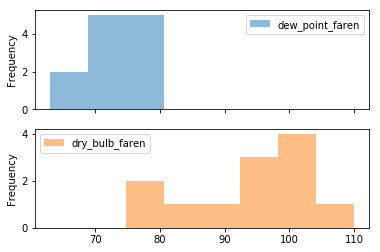

In [617]:
# Generate a histogram with bins=8, alpha=0.5, subplots=True
monthly_max.plot(
    kind = 'hist',
    bins = 8,
    alpha = 0.5,
    subplots = True)

# Show the plot
plt.show()

### Probability of high temperatures

In [618]:
# Extract the maximum temperature in August 2010 from df_climate: august_max
august_max = df_climate.loc['2010-Aug', 'Temperature'].max()
print(august_max)

95.3


In [619]:
# Resample the August 2011 temperatures in df_clean by day and aggregate the maximum value: august_2011
august_2011 = df_clean.loc['2011-Aug','dry_bulb_faren'].resample('D').max()

august_2011.head()

2011-08-01    103.0
2011-08-02    103.0
2011-08-03    103.0
2011-08-04    104.0
2011-08-05    103.0
Freq: D, Name: dry_bulb_faren, dtype: float64

In [620]:
# Filter out days in august_2011 where the value exceeded august_max: august_2011_high
august_2011_high = august_2011[august_2011 > august_max]

august_2011_high.head()

2011-08-01    103.0
2011-08-02    103.0
2011-08-03    103.0
2011-08-04    104.0
2011-08-05    103.0
Name: dry_bulb_faren, dtype: float64

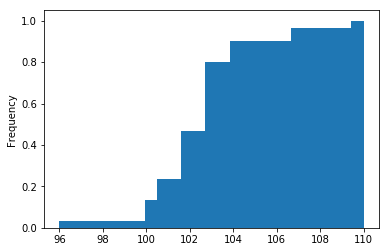

In [621]:
# Construct a CDF of august_2011_high
august_2011_high.plot(
    kind = 'hist',
    cumulative = True,
    normed = True,
    bins = 25)

# Display the plot
plt.show()

## Congratulations!